In [ ]:
#pip install openpyxl

In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def clustering(data, participants): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
        kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k

In [3]:
def silhouette(data, clusters):
    kmeans = KMeans(n_clusters = clusters, max_iter = 500, random_state = 0)
    kmeans.fit_predict(data)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')#ax[q-1][mod])#, ax = ax[x%3][y%2]
    
    #Fit the visualizer
    visualizer.fit(data)
    #fig, ax = plt.subplots(3,2, figsize = (10,10))

# SWELL

In [5]:
swell = pd.read_csv("Final_CSVs/swell_new.csv")

In [6]:
swell_extra = pd.read_excel('Personality_Files/swell_person.xlsx')

In [7]:
swell

,HR,RMSSD,SCL,id,dataset,stress
0,58,0.093757,119.071484,PP4,Train,0
1,999,999.000000,138.735573,PP19,Train,0
2,999,999.000000,999.000000,PP22,Train,1
3,999,999.000000,120.251942,PP3,Train,1
4,70,0.064568,561.332213,PP21,Train,0
...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1
3136,999,999.000000,999.000000,PP22,Test,1
3137,999,999.000000,93.893556,PP4,Test,0
3138,999,999.000000,999.000000,PP23,Test,0


In [8]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress,heart disease,medicine,Internal control index
0,PP1,27,m,student,right,no,6,6,6,6,6,no,no,2.93
1,PP2,25,m,student,right,no,6,6,6,4,5,no,no,4.25
2,PP3,24,m,student,right,no,6,6,6,6,6,no,no,3.61
3,PP4,24,m,student,right,no,6,6,6,2,6,no,no,3.61
4,PP5,24,f,student,right,no,6,6,6,6,6,no,no,3.71
5,PP6,24,m,student,right,no,6,6,6,6,6,no,no,3.86
6,PP7,22,m,student,right,no,6,6,6,6,6,no,no,3.64
7,PP8,27,m,MSc Electrical Engineering,right,yes,6,6,6,3,6,no,no,3.57
8,PP9,28,m,PhD informatics,right,no,6,6,6,2,6,no,no,3.25
9,PP10,25,m,Information Science,right,no,6,6,6,6,6,no,no,3.39


In [9]:
# Drop unnecessary features

swell_extra.drop(['heart disease'], axis=1, inplace=True)
swell_extra.drop(['medicine'], axis=1, inplace=True)
swell_extra.drop(['Glasses'], axis=1, inplace=True)
swell_extra.drop(['smoke'], axis=1, inplace=True)
swell_extra.drop(['alcohol'], axis=1, inplace=True)

In [10]:
# Group all Master students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Electrical Engineering","MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Master MKE", "MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Technische Informatica", "MSc", swell_extra['Occupation'])

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Computer Engineering", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Physics", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Information Science", "student", swell_extra['Occupation'])


swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Icelandic", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Photography", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Technische bestuurskunde", "other", swell_extra['Occupation'])

# Group all PhD students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD informatics", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="student (Phd?)", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD candidate", "PhD", swell_extra['Occupation'])

In [11]:
# Label Encoding categorical features

le = preprocessing.LabelEncoder()

swell_extra['Occupation'] = le.fit_transform(swell_extra['Occupation'])
swell_extra['Dominant hand'] = le.fit_transform(swell_extra['Dominant hand'])
swell_extra['Gender'] = le.fit_transform(swell_extra['Gender'])

In [12]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,27,1,3,1,6,6,6,2.93
1,PP2,25,1,3,1,6,4,5,4.25
2,PP3,24,1,3,1,6,6,6,3.61
3,PP4,24,1,3,1,6,2,6,3.61
4,PP5,24,0,3,1,6,6,6,3.71
5,PP6,24,1,3,1,6,6,6,3.86
6,PP7,22,1,3,1,6,6,6,3.64
7,PP8,27,1,0,1,6,3,6,3.57
8,PP9,28,1,1,1,6,2,6,3.25
9,PP10,25,1,3,1,6,6,6,3.39


In [13]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#swell_extra[['Age', 'Occupation', 'smoke', 'physical', 'stress', 'Internal control index']] = scaler.fit_transform(swell_extra[['Age', 'Occupation', 'smoke',  'physical', 'stress', 'Internal control index']])


In [14]:

scaler = StandardScaler()
swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]] = scaler.fit_transform(swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]])


In [15]:
swell_extra = swell_extra.rename(columns={"PP":"id"})
swell_extra

,id,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632
1,PP2,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695
2,PP3,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009
3,PP4,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009
4,PP5,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288
5,PP6,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734
6,PP7,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320
7,PP8,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928
8,PP9,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280
9,PP10,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064


## Single-Attribute-Splitting (Personality)

In [16]:
# In order to cluster the users based on gender and personality, we keep only "Gender" and "Internal control index" 
# columns

swell_personality = swell_extra[['id', "Gender", "Internal control index"]]
swell_personality

,id,Gender,Internal control index
0,PP1,0.685994,-2.531632
1,PP2,0.685994,1.986695
2,PP3,0.685994,-0.204009
3,PP4,0.685994,-0.204009
4,PP5,-1.457738,0.138288
5,PP6,0.685994,0.651734
6,PP7,0.685994,-0.101320
7,PP8,0.685994,-0.340928
8,PP9,0.685994,-1.436280
9,PP10,0.685994,-0.957064


In [17]:
# Keep user IDs in a separate datarame

ids = swell_personality['id']
swell_personality.drop(['id'], axis=1, inplace=True)

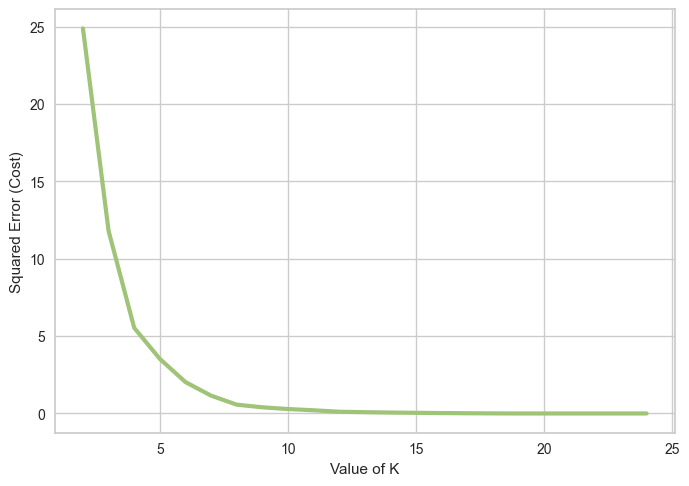

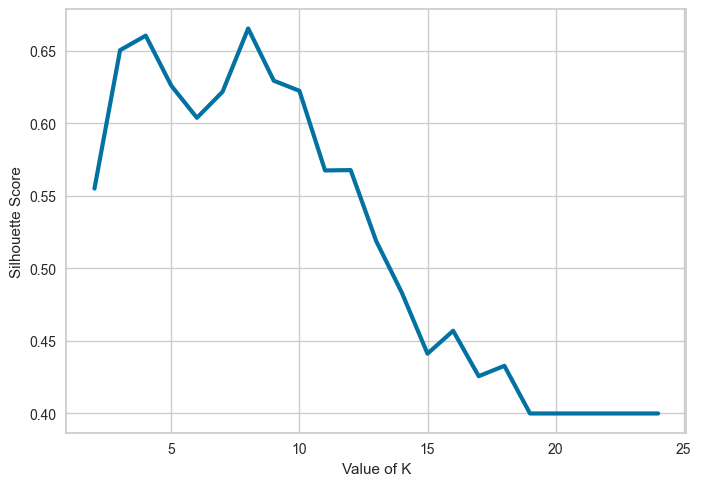

In [18]:
clustering(swell_personality, 25)

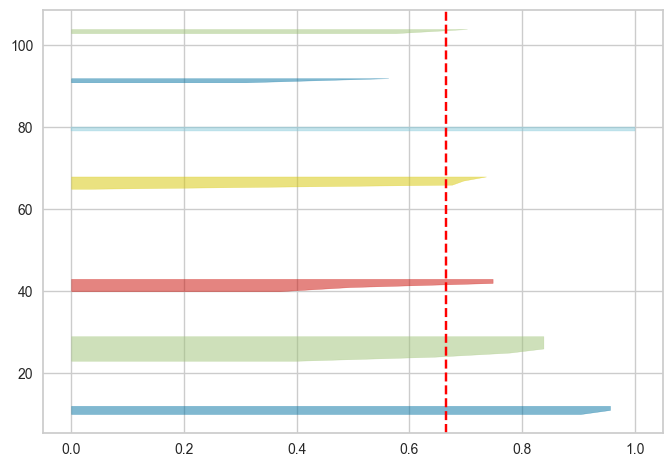

In [20]:
silhouette(swell_personality, 8)

In [21]:
kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(swell_personality)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
1          7
2          4
4          4
0          3
5          2
6          2
7          2
3          1
dtype: int64

####  Visualization with t-SNE

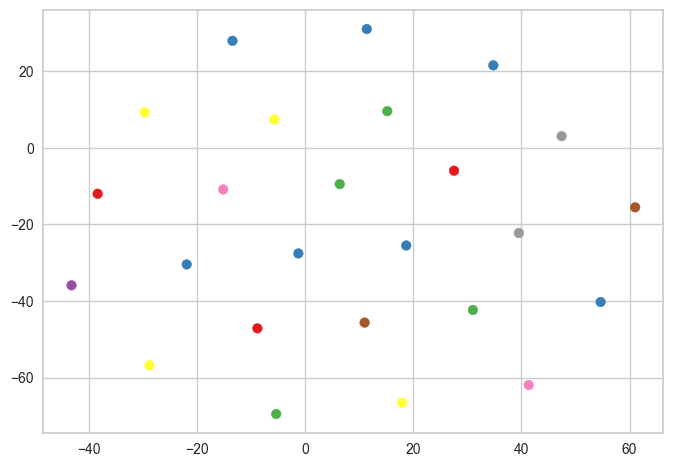

In [31]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
model = kmeans.fit(swell_personality)
tsne = TSNE().fit_transform(swell_personality)
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set1')

In [24]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,PP1,3
1,PP2,0
2,PP3,1
3,PP4,1
4,PP5,2
5,PP6,4
6,PP7,1
7,PP8,1
8,PP9,6
9,PP10,6


In [ ]:
swell_grouped_all = swell.join(clusters.set_index('id'), on='id')
swell_grouped_all

In [ ]:
swell_grouped_all.to_csv("Final_CSVs/swell_clusters_personality.csv", index = False)

In [ ]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

swell_grouped_all = swell_grouped_all.drop('dataset', axis = 1)
swell_grouped_all

In [ ]:
unique_participants = swell_grouped_all["Cluster"].unique()
all_group = swell_grouped_all.groupby('Cluster')

In [ ]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = all_group.get_group(participant)
    grid = setup(data=part_df, target='stress', html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models()
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

In [ ]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [ ]:
print("Mean Accuracy SWELL- Cluster Personality: ", mean_acc)
print("Mean Precision SWELL- Cluster Personality: ", mean_prec)
print("Mean Recall SWELL- Cluster Personality: ", mean_rec)
print("Mean F1-score SWELL- Cluster Personality: ", mean_f1)

## Multi-Attribute-Splitting (All features)

In [32]:
swell_all_features = swell[['id', 'HR', 'RMSSD', 'SCL']]
swell_all_features

,id,HR,RMSSD,SCL
0,PP4,58,0.093757,119.071484
1,PP19,999,999.000000,138.735573
2,PP22,999,999.000000,999.000000
3,PP3,999,999.000000,120.251942
4,PP21,70,0.064568,561.332213
...,...,...,...,...
3135,PP24,999,999.000000,158.138912
3136,PP22,999,999.000000,999.000000
3137,PP4,999,999.000000,93.893556
3138,PP23,999,999.000000,999.000000


In [33]:
swell_mean = swell_all_features.groupby('id', as_index = False, group_keys = True).mean()
swell_mean = swell_mean.rename(columns={"HR": "HR_mean", "RMSSD": "RMSSD_mean", "SCL": "SCL_mean"})
    
swell_min = swell_all_features.groupby('id', as_index = False, group_keys = True).min()
swell_min = swell_min.rename(columns={"HR": "HR_min", "RMSSD": "RMSSD_min", "SCL": "SCL_min"})
  
swell_std = swell_all_features.groupby('id', as_index = False, group_keys = True).std()
swell_std = swell_std.rename(columns={"HR": "HR_std", "RMSSD": "RMSSD_std", "SCL": "SCL_std"})

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

swell_mean[['HR_mean', 'RMSSD_mean', 'SCL_mean']] = scaler.fit_transform(swell_mean[['HR_mean', 'RMSSD_mean', 'SCL_mean']])
swell_min[['HR_min', 'RMSSD_min', 'SCL_min']] = scaler.fit_transform(swell_min[['HR_min', 'RMSSD_min', 'SCL_min']])
swell_std[['HR_std', 'RMSSD_std', 'SCL_std']] = scaler.fit_transform(swell_std[['HR_std', 'RMSSD_std', 'SCL_std']])

In [35]:
swell_all_grouped = swell_extra.join(swell_mean.set_index('id'), on='id')
swell_all_grouped = swell_all_grouped.join(swell_min.set_index('id'), on='id')
swell_all_grouped = swell_all_grouped.join(swell_std.set_index('id'), on='id')
swell_all_grouped

,id,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index,HR_mean,RMSSD_mean,SCL_mean,HR_min,RMSSD_min,SCL_min,HR_std,RMSSD_std,SCL_std
0,PP1,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632,-0.900394,-0.876707,-1.222782,-0.319298,-0.294909,-1.004249,0.465365,0.439151,-0.949413
1,PP2,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695,-1.646229,-1.646932,-1.230384,-0.295646,-0.294888,-0.971799,-1.217241,-1.219896,-1.822954
2,PP3,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009,0.884367,0.867364,-0.548374,-0.264111,-0.294924,-0.312573,0.186334,0.249442,0.335381
3,PP4,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009,1.243265,1.247300,0.375704,-0.319298,-0.294784,-0.823730,-0.424820,-0.457861,1.405055
4,PP5,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288,0.122998,0.126018,-0.862919,-0.307472,-0.294853,-0.768211,0.820475,0.816977,0.149815
5,PP6,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734,-0.575141,-0.550986,-1.113142,-0.323240,-0.294865,-0.861158,0.741422,0.707874,-1.239744
6,PP7,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320,-1.023418,-1.017587,-0.207807,-0.323240,-0.294906,0.021783,0.272457,0.269073,0.687546
7,PP8,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928,1.656421,1.654327,1.227664,3.390077,3.391165,1.674636,-2.793593,-2.803529,1.016631
8,PP9,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280,0.450904,0.458573,2.375174,-0.323240,-0.294842,3.584380,0.682556,0.662209,-0.046574
9,PP10,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064,0.398311,0.406084,-0.785393,-0.315356,-0.294852,-0.630076,0.715259,0.695735,0.187333


In [36]:
# Keep user IDs in a separate datarame

ids = swell_all_grouped['id']
swell_all_grouped.drop(['id'], axis=1, inplace=True)

In [37]:
swell_all_grouped.drop(['RMSSD_min'], axis=1, inplace=True)
swell_all_grouped

,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index,HR_mean,RMSSD_mean,SCL_mean,HR_min,SCL_min,HR_std,RMSSD_std,SCL_std
0,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632,-0.900394,-0.876707,-1.222782,-0.319298,-1.004249,0.465365,0.439151,-0.949413
1,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695,-1.646229,-1.646932,-1.230384,-0.295646,-0.971799,-1.217241,-1.219896,-1.822954
2,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009,0.884367,0.867364,-0.548374,-0.264111,-0.312573,0.186334,0.249442,0.335381
3,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009,1.243265,1.247300,0.375704,-0.319298,-0.823730,-0.424820,-0.457861,1.405055
4,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288,0.122998,0.126018,-0.862919,-0.307472,-0.768211,0.820475,0.816977,0.149815
5,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734,-0.575141,-0.550986,-1.113142,-0.323240,-0.861158,0.741422,0.707874,-1.239744
6,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320,-1.023418,-1.017587,-0.207807,-0.323240,0.021783,0.272457,0.269073,0.687546
7,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928,1.656421,1.654327,1.227664,3.390077,1.674636,-2.793593,-2.803529,1.016631
8,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280,0.450904,0.458573,2.375174,-0.323240,3.584380,0.682556,0.662209,-0.046574
9,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064,0.398311,0.406084,-0.785393,-0.315356,-0.630076,0.715259,0.695735,0.187333


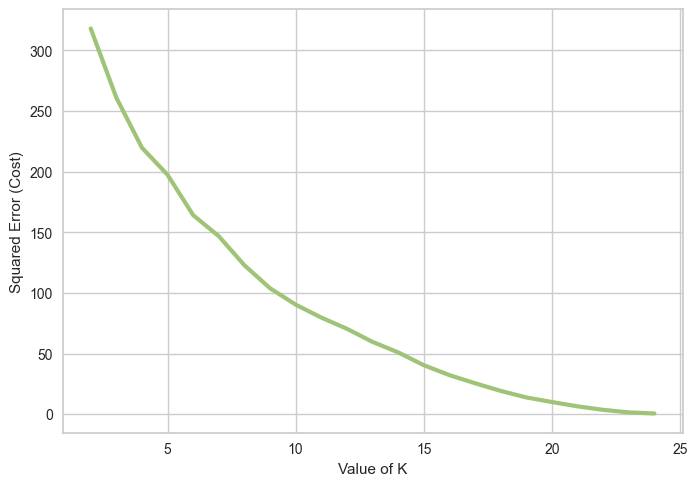

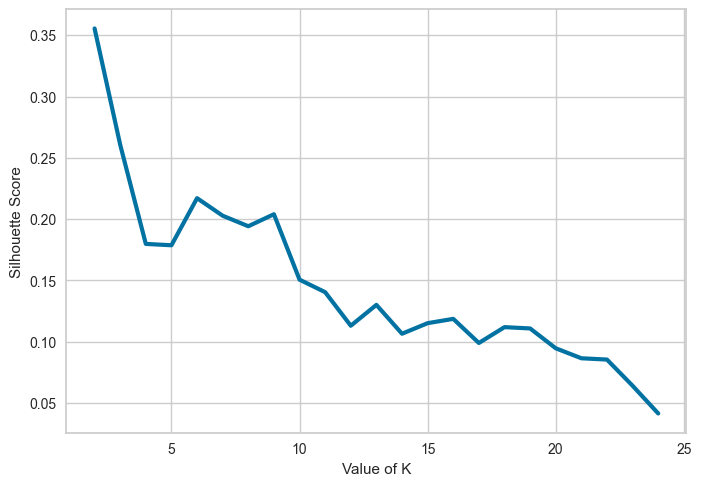

In [38]:
clustering(swell_all_grouped, 25)

In [ ]:
silhouette(swell_all_grouped, 10)

In [ ]:
kmeans = KMeans(n_clusters = 11, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(swell_all_grouped)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

####  Visualization with t-SNE

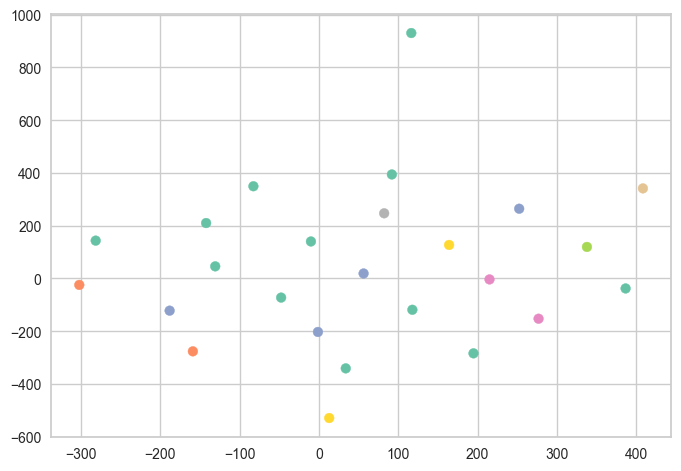

In [71]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
model = kmeans.fit(swell_all_grouped)
tsne = TSNE().fit_transform(swell_all_grouped)
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set2')

In [ ]:
clusters = pd.concat([ids, y], axis=1)
clusters

In [ ]:
swell_grouped_all = swell.join(clusters.set_index('id'), on='id')
swell_grouped_all

In [ ]:
swell_grouped_all.to_csv("Final_CSVs/swell_clusters_all11.csv", index = False)

In [ ]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

swell_grouped_all = swell_grouped_all.drop('dataset', axis = 1)
swell_grouped_all

In [ ]:
unique_participants = swell_grouped_all["Cluster"].unique()
all_group = swell_grouped_all.groupby('Cluster')

In [ ]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = all_group.get_group(participant)
    grid = setup(data=part_df, target='stress', html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models()
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

In [ ]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [ ]:
print("Mean Accuracy SWELL- Cluster All Features: ",mean_acc)
print("Mean Precision SWELL- Cluster All Features: ",mean_f1)
print("Mean Recall SWELL- Cluster All Features: ",mean_rec)
print("Mean F1-score SWELL- Cluster All Features: ",mean_prec)

# Lifesnaps

In [4]:
lifesnaps = pd.read_csv("Final_CSVs/lifesnaps_new.csv")

In [5]:
#lifesnaps_breq = pd.read_csv('../scored_surveys/breq.csv')
lifesnaps_personality = pd.read_csv('../scored_surveys/personality.csv')
#lifesnaps_ttm = pd.read_csv('../scored_surveys/ttm.csv')

In [6]:
lifesnaps_personality = lifesnaps_personality.drop(["Unnamed: 0", "submitdate"], axis = 1)
lifesnaps_personality = lifesnaps_personality.drop("type", axis = 1)
lifesnaps_personality.rename(columns={"user_id": "id"}, inplace=True)

In [7]:
lifesnaps_personality

,id,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,21.0,33.0,45.0,42.0,40.0,MALE,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2eaf67b776a2406b14ac,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,HIGH,AVERAGE,LOW,HIGH
2,621e2ed667b776a24085d8d1,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE
3,621e2f3967b776a240c654db,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,AVERAGE,LOW,HIGH,AVERAGE
4,621e2f6167b776a240e082a9,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,AVERAGE,AVERAGE,HIGH,LOW
5,621e2f7a67b776a240f14425,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,AVERAGE,HIGH,HIGH,AVERAGE
6,621e2f9167b776a240011ccb,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,HIGH,AVERAGE,LOW,HIGH
7,621e2fb367b776a24015accd,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,AVERAGE,LOW,LOW,HIGH
8,621e2fce67b776a240279baa,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,HIGH,AVERAGE,LOW,AVERAGE
9,621e2ff067b776a2403eb737,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,HIGH,LOW,LOW,LOW


In [8]:
le = preprocessing.LabelEncoder()

lifesnaps_personality['gender'] = le.fit_transform(lifesnaps_personality['gender'])
lifesnaps_personality['ipip_extraversion_category'] = le.fit_transform(lifesnaps_personality['ipip_extraversion_category'])
lifesnaps_personality['ipip_agreeableness_category'] = le.fit_transform(lifesnaps_personality['ipip_agreeableness_category'])
lifesnaps_personality['ipip_conscientiousness_category'] = le.fit_transform(lifesnaps_personality['ipip_conscientiousness_category'])
lifesnaps_personality['ipip_stability_category'] = le.fit_transform(lifesnaps_personality['ipip_stability_category'])
lifesnaps_personality['ipip_intellect_category'] = le.fit_transform(lifesnaps_personality['ipip_intellect_category'])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]] = scaler.fit_transform(lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]])

## Single-Attribute-Splitting (Personality)

In [10]:
ids = lifesnaps_personality["id"]
lifesnaps_personality = lifesnaps_personality.drop("id", axis = 1)

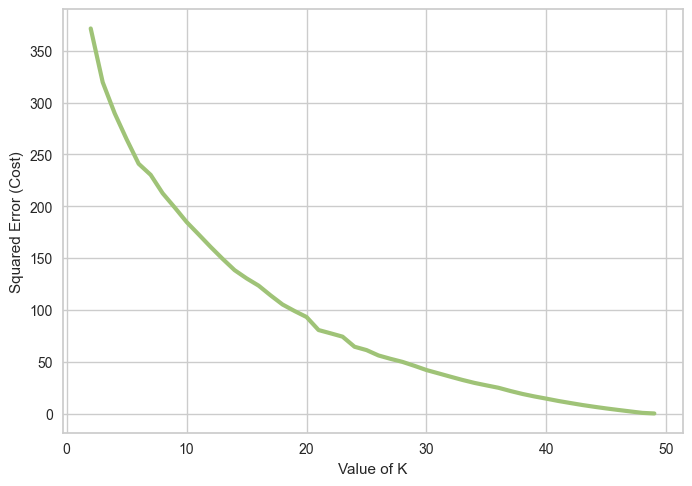

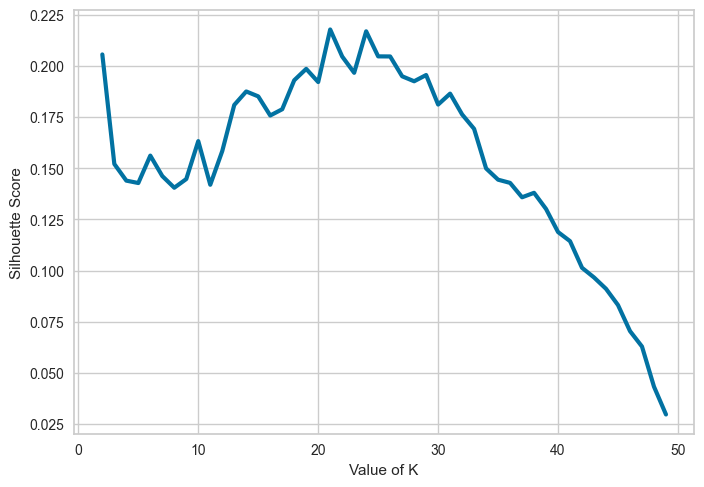

In [11]:
clustering(lifesnaps_personality, 50)

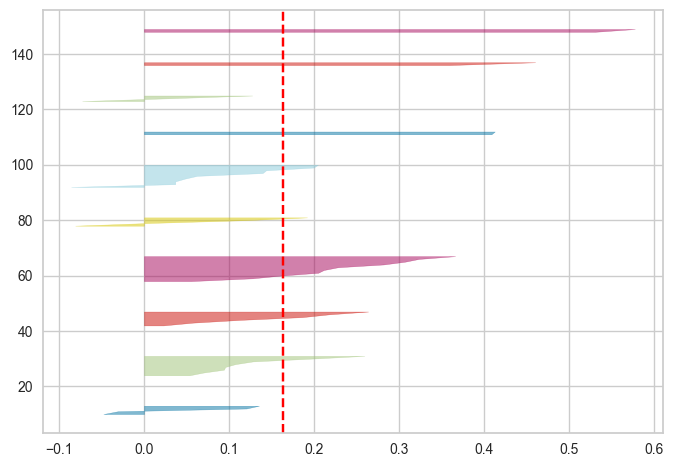

In [14]:
silhouette(lifesnaps_personality, 10)

In [15]:
kmeans = KMeans(n_clusters = 10, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(lifesnaps_personality)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
3          10
5           9
1           8
2           6
0           4
4           4
7           3
6           2
8           2
9           2
dtype: int64

In [1]:
#x=sklearn.decomposition.PCA(n_components = 2).fit_transform(lifesnaps_personality)
#plt.scatter(x[:,0], x[:,1], c=model.labels_, cmap='viridis')

####  Visualization with t-SNE

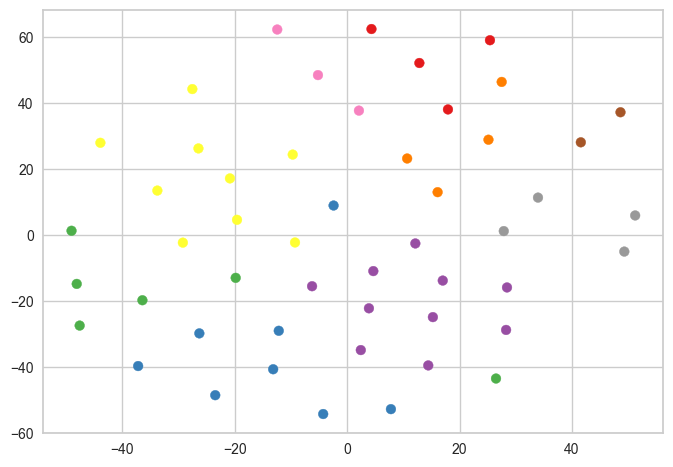

In [43]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 10, max_iter = 500, random_state = 0)
model = kmeans.fit(lifesnaps_personality)
tsne = TSNE().fit_transform(lifesnaps_personality)
#cmap = ListedColormap(['r', 'g', 'b'])
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set1')

<AxesSubplot:xlabel='x', ylabel='y'>

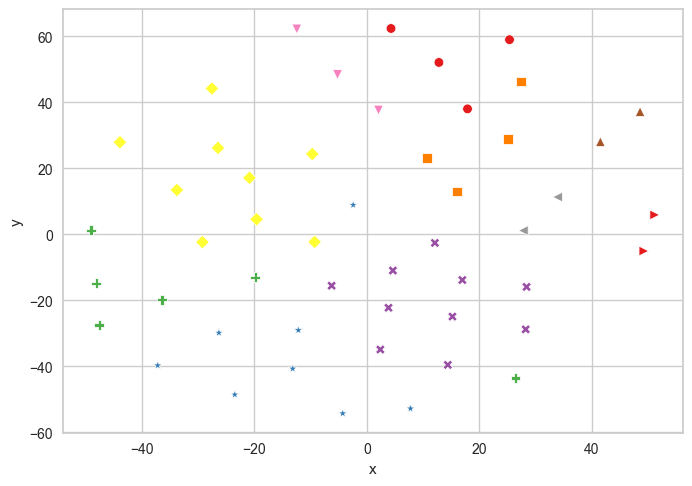

In [49]:
test = pd.concat([pd.DataFrame(tsne, columns=['x','y']),pd.DataFrame(model.labels_, columns=['c'])], axis=1)
mark = ["o", "*", "P", "X", "s", "D", "^", "v", "<", ">"]
sns.scatterplot(data=test, x="x", y="y",palette='Set1', hue="c", style='c', legend=False, markers = mark)

In [50]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,621e2e8e67b776a24055b564,8
1,621e2eaf67b776a2406b14ac,5
2,621e2ed667b776a24085d8d1,2
3,621e2f3967b776a240c654db,3
4,621e2f6167b776a240e082a9,1
5,621e2f7a67b776a240f14425,3
6,621e2f9167b776a240011ccb,5
7,621e2fb367b776a24015accd,2
8,621e2fce67b776a240279baa,5
9,621e2ff067b776a2403eb737,5


In [56]:
lifesnaps_statistics = pd.merge(lifesnaps_personality, clusters, on = "id")
lifesnaps_statistics = lifesnaps_statistics.drop("id", axis = 1)
#lifesnaps_statistics

,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category,Cluster
0,21.0,33.0,45.0,42.0,40.0,MALE,LOW,LOW,HIGH,HIGH,AVERAGE,8
1,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,HIGH,AVERAGE,LOW,HIGH,5
2,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,2
3,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,AVERAGE,LOW,HIGH,AVERAGE,3
4,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,AVERAGE,AVERAGE,HIGH,LOW,1
5,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,AVERAGE,HIGH,HIGH,AVERAGE,3
6,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,HIGH,AVERAGE,LOW,HIGH,5
7,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,AVERAGE,LOW,LOW,HIGH,2
8,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,HIGH,AVERAGE,LOW,AVERAGE,5
9,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,HIGH,LOW,LOW,LOW,5


In [63]:
lifesnaps_mean = lifesnaps_statistics.groupby('Cluster', as_index = False, group_keys = True).mean()
lifesnaps_mean



,Cluster,extraversion,agreeableness,conscientiousness,stability,intellect
0,0,17.250000,30.750000,30.250000,29.750000,31.250000
1,1,39.125000,45.000000,35.250000,35.625000,39.250000
2,2,37.166667,40.166667,24.666667,30.833333,35.333333
3,3,30.500000,38.200000,36.600000,35.400000,38.000000
4,4,21.250000,35.750000,37.250000,29.000000,34.250000
5,5,33.000000,41.666667,33.333333,19.888889,34.888889
6,6,22.000000,31.000000,25.000000,27.500000,46.000000
7,7,30.000000,27.333333,29.000000,24.333333,30.000000
8,8,20.500000,36.500000,42.000000,42.000000,37.500000
9,9,20.000000,36.500000,42.500000,21.000000,45.500000


In [86]:
lifesnaps_statistics.mean()

extraversion         30.14
agreeableness        38.28
conscientiousness    33.44
stability            29.84
intellect            36.60
Cluster               3.56
dtype: float64

In [64]:
lifesnaps_std = lifesnaps_statistics.groupby('Cluster', as_index = False, group_keys = True).std()
lifesnaps_std

,Cluster,extraversion,agreeableness,conscientiousness,stability,intellect
0,0,3.500000,4.112988,7.274384,6.898067,2.753785
1,1,5.383507,3.116775,5.147815,5.069164,4.978525
2,2,2.316607,3.488075,3.141125,5.706721,4.501851
3,3,4.143268,4.442222,4.647580,5.168279,3.126944
4,4,3.304038,4.787136,6.238322,4.898979,4.573474
5,5,5.477226,5.244044,5.123475,5.206833,4.371626
6,6,0.000000,1.414214,1.414214,4.949747,0.000000
7,7,4.582576,6.658328,9.643651,9.814955,3.000000
8,8,0.707107,4.949747,4.242641,0.000000,3.535534
9,9,2.828427,0.707107,4.949747,4.242641,3.535534


In [87]:
lifesnaps_statistics.std()

extraversion         8.164158
agreeableness        6.353659
conscientiousness    6.916883
stability            8.182510
intellect            5.268311
Cluster              2.417285
dtype: float64

In [84]:
lifesnaps_statistics.groupby('Cluster')['gender'].value_counts().unstack(fill_value=0)

gender,FEMALE,MALE
Cluster,,
0,1,3
1,6,2
2,3,3
3,0,10
4,4,0
5,6,3
6,0,2
7,0,3
8,0,2


In [85]:
lifesnaps_statistics.groupby('Cluster')['ipip_extraversion_category'].value_counts().unstack(fill_value=0)

ipip_extraversion_category,AVERAGE,HIGH,LOW
Cluster,,,
0,0,0,4
1,2,6,0
2,2,4,0
3,7,3,0
4,0,0,4
5,5,3,1
6,0,0,2
7,2,1,0
8,0,0,2


In [80]:
lifesnaps_statistics.groupby('Cluster')['ipip_agreeableness_category'].value_counts().unstack(fill_value=0)

ipip_agreeableness_category,AVERAGE,HIGH,LOW
Cluster,,,
0,0,0,4
1,3,5,0
2,4,2,0
3,7,3,0
4,1,0,3
5,1,7,1
6,0,0,2
7,0,0,3
8,0,1,1


In [81]:
lifesnaps_statistics.groupby('Cluster')['ipip_conscientiousness_category'].value_counts().unstack(fill_value=0)

ipip_conscientiousness_category,AVERAGE,HIGH,LOW
Cluster,,,
0,0,1,3
1,5,3,0
2,0,0,6
3,4,5,1
4,0,3,1
5,6,2,1
6,0,0,2
7,0,1,2
8,0,2,0


In [82]:
lifesnaps_statistics.groupby('Cluster')['ipip_stability_category'].value_counts().unstack(fill_value=0)

ipip_stability_category,AVERAGE,HIGH,LOW
Cluster,,,
0,1,2,1
1,2,6,0
2,3,2,1
3,6,4,0
4,3,1,0
5,0,0,9
6,1,0,1
7,2,0,1
8,0,2,0


In [83]:
lifesnaps_statistics.groupby('Cluster')['ipip_intellect_category'].value_counts().unstack(fill_value=0)

ipip_intellect_category,AVERAGE,HIGH,LOW
Cluster,,,
0,0,0,4
1,2,5,1
2,3,2,1
3,9,1,0
4,2,1,1
5,2,3,4
6,0,2,0
7,0,0,3
8,2,0,0


In [ ]:
lifesnaps_grouped_all = pd.merge(lifesnaps, clusters, on = "id")
lifesnaps_grouped_all

In [ ]:
lifesnaps_grouped_all.to_csv("Final_CSVs/lifesnaps_clusters_personality10.csv", index = False)

In [ ]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

lifesnaps_grouped_all = lifesnaps_grouped_all.drop('dataset', axis = 1)
lifesnaps_grouped_all

In [ ]:
unique_participants = lifesnaps_grouped_all["Cluster"].unique()
personality_group = lifesnaps_grouped_all.groupby('Cluster')

In [ ]:
lifesnaps_grouped_all[["id", "Cluster"]]

In [ ]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = personality_group.get_group(participant)
    grid = setup(data=part_df, target='stress', fix_imbalance = True, html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models(sort="F1")
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

In [ ]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [ ]:
print("Mean Accuracy Lifesnaps - Cluster Personality: ", mean_acc)
print("Mean Precision Lifesnaps- Cluster Personality: ", mean_prec)
print("Mean Recall Lifesnaps- Cluster Personality: ", mean_rec)
print("Mean F1-score Lifesnaps- Cluster Personality: ", mean_f1)

## Multi-Attribute-Splittng (All Features)

In [10]:
lifesnaps

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,bpm,calories,daily1temperature1variation,day,day1cos,day1sin,distance,filteredDemographicVO2Max,full1sleep1breathing1rate,gender,id,lightly1active1minutes,max1goal,min1goal,mindfulness1session,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,minutes1below1default1zone11,minutes1in1default1zone11,minutes1in1default1zone12,minutes1in1default1zone13,moderately1active1minutes,month,month1cos,month1sin,nightly1temperature,nremhr,resting1hr,rmssd,scl1avg,sedentary1minutes,sleep1deep1ratio,sleep1duration,sleep1efficiency,sleep1light1ratio,sleep1rem1ratio,sleep1wake1ratio,spo2,step1goal,step1goal1label,steps,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,dataset,stress
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,91.659123,3241.52,-0.460087,4,0.688967,0.724793,9275.7,48.07785,NaN,0.0,621e329067b776a2402ffad2,376.0,10000.0,8000.0,False,0.0,305.0,51.0,0.0,616.0,672.0,0.0,0.0,39.0,6,-0.809017,-5.877853e-01,33.513581,NaN,75.461346,NaN,NaN,649.0,1.550000,21360000.0,95.0,0.689119,1.179104,1.378378,NaN,9999.0,4.0,12974.0,20.0,22,-0.988831,-1.490423e-01,4,-0.900969,-0.433884,2021,Train,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,NaN,NaN,NaN,12,-0.758758,0.651372,NaN,NaN,NaN,1.0,621e2f1b67b776a240b3d87c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,-0.309017,-9.510565e-01,NaN,NaN,NaN,NaN,6.360605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,-0.500000,-8.660254e-01,0,1.000000,0.000000,2021,Train,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,90.021444,2523.09,-1.986618,18,-0.874347,-0.485302,6187.5,49.72347,11.6,1.0,621e339967b776a240e502de,256.0,NaN,NaN,False,0.0,461.0,52.0,0.0,1209.0,153.0,62.0,5.0,74.0,12,0.309017,9.510565e-01,35.075916,51.707,57.433536,47.293,NaN,488.0,1.297297,30780000.0,98.0,0.970954,1.364583,0.732394,94.9,NaN,NaN,17479.0,109.0,50,0.365341,9.308737e-01,5,-0.222521,-0.974928,2021,Train,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.0,NaN,1800.00,NaN,3,0.820763,0.571268,NaN,NaN,NaN,0.0,621e332267b776a24092a584,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9,0.809017,-5.877853e-01,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35,0.500000,-8.660254e-01,4,-0.900969,-0.433884,2021,Train,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,NaN,2318.40,NaN,3,0.820763,0.571268,NaN,NaN,NaN,0.0,621e32d967b776a240627414,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7,-0.309017,-9.510565e-01,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26,-0.733052,-6.801727e-01,5,-0.222521,-0.974928,2021,Train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.571340,1429.29,NaN,15,-0.994869,0.101168,1723.5,36.39159,NaN,NaN,621e346f67b776a24081744f,30.0,NaN,NaN,False,NaN,NaN,NaN,NaN,168.0,29.0,0.0,0.0,1.0,1,0.809017,5.877853e-01,NaN,NaN,NaN,NaN,NaN,1399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2595.0,10.0,2,0.955573,2.947552e-01,5,-0.222521,-0.974928,2022,Test,0
7406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0,NaN,1612.80,NaN,13,-0.874347,0.485302,NaN,NaN,NaN,0.0,621e34ec67b776a240d60873,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7,-0.309017,-9.510565e-01,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28,-0.500000,-8.660254e-01,1,0.623490,0.781831,2021,Test,0
7407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.0,NaN,1713.60,NaN,24,0.151428,-0.988468,NaN,NaN,NaN,0.0,621e309267b776a240ae1cdb,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12,0.309017,9.510565e-01,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51,0.222521,9.749279e-01,4,-0.900969,-0.433884,2021,Test,0
7408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,NaN,2318.40,NaN,13,-0.874347,0.485302,NaN,NaN,NaN

In [11]:
lifesnaps_all_features = lifesnaps.loc[:, ~lifesnaps.columns.isin(['stress', 'dataset', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME1OFFICE', 'OTHER', 'OUTDOORS',
       'TRANSIT', 'WORK/SCHOOL','month', 'month1cos', 'month1sin', 'week', 'week1cos', 'week1sin', 'weekday', 'weekday1cos', 'weekday1sin', 'year', 'day', 'day1cos', 'day1sin'])]
lifesnaps_all_features

,age,bmi,bpm,calories,daily1temperature1variation,distance,filteredDemographicVO2Max,full1sleep1breathing1rate,gender,id,lightly1active1minutes,max1goal,min1goal,mindfulness1session,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,minutes1below1default1zone11,minutes1in1default1zone11,minutes1in1default1zone12,minutes1in1default1zone13,moderately1active1minutes,nightly1temperature,nremhr,resting1hr,rmssd,scl1avg,sedentary1minutes,sleep1deep1ratio,sleep1duration,sleep1efficiency,sleep1light1ratio,sleep1rem1ratio,sleep1wake1ratio,spo2,step1goal,step1goal1label,steps,very1active1minutes
0,1.0,23.0,91.659123,3241.52,-0.460087,9275.7,48.07785,NaN,0.0,621e329067b776a2402ffad2,376.0,10000.0,8000.0,False,0.0,305.0,51.0,0.0,616.0,672.0,0.0,0.0,39.0,33.513581,NaN,75.461346,NaN,NaN,649.0,1.550000,21360000.0,95.0,0.689119,1.179104,1.378378,NaN,9999.0,4.0,12974.0,20.0
1,1.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,621e2f1b67b776a240b3d87c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.360605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,20.0,90.021444,2523.09,-1.986618,6187.5,49.72347,11.6,1.0,621e339967b776a240e502de,256.0,NaN,NaN,False,0.0,461.0,52.0,0.0,1209.0,153.0,62.0,5.0,74.0,35.075916,51.707,57.433536,47.293,NaN,488.0,1.297297,30780000.0,98.0,0.970954,1.364583,0.732394,94.9,NaN,NaN,17479.0,109.0
3,0.0,21.0,NaN,1800.00,NaN,NaN,NaN,NaN,0.0,621e332267b776a24092a584,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,30.0,NaN,2318.40,NaN,NaN,NaN,NaN,0.0,621e32d967b776a240627414,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,NaN,NaN,82.571340,1429.29,NaN,1723.5,36.39159,NaN,NaN,621e346f67b776a24081744f,30.0,NaN,NaN,False,NaN,NaN,NaN,NaN,168.0,29.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2595.0,10.0
7406,0.0,24.0,NaN,1612.80,NaN,NaN,NaN,NaN,0.0,621e34ec67b776a240d60873,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7407,0.0,18.0,NaN,1713.60,NaN,NaN,NaN,NaN,0.0,621e309267b776a240ae1cdb,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7408,1.0,30.0,NaN,2318.40,NaN,NaN,NaN,NaN,0.0,621e32d967b776a240627414,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [12]:
lifesnaps_all_features.columns

Index(['age', 'bmi', 'bpm', 'calories', 'daily1temperature1variation',
       'distance', 'filteredDemographicVO2Max', 'full1sleep1breathing1rate',
       'gender', 'id', 'lightly1active1minutes', 'max1goal', 'min1goal',
       'mindfulness1session', 'minutesAfterWakeup', 'minutesAsleep',
       'minutesAwake', 'minutesToFallAsleep', 'minutes1below1default1zone11',
       'minutes1in1default1zone11', 'minutes1in1default1zone12',
       'minutes1in1default1zone13', 'moderately1active1minutes',
       'nightly1temperature', 'nremhr', 'resting1hr', 'rmssd', 'scl1avg',
       'sedentary1minutes', 'sleep1deep1ratio', 'sleep1duration',
       'sleep1efficiency', 'sleep1light1ratio', 'sleep1rem1ratio',
       'sleep1wake1ratio', 'spo2', 'step1goal', 'step1goal1label', 'steps',
       'very1active1minutes'],
      dtype='object')

In [13]:
lifesnaps_mean = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).mean()
lifesnaps_mean.columns = map(lambda x: x + '_mean', lifesnaps_mean.columns)
lifesnaps_mean = lifesnaps_mean.rename({'id_mean': 'id'}, axis='columns')
lifesnaps_mean

lifesnaps_min = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).min()
lifesnaps_min.columns = map(lambda x: x + '_min', lifesnaps_min.columns)
lifesnaps_min = lifesnaps_min.rename({'id_min': 'id'}, axis='columns')
lifesnaps_min

lifesnaps_std = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).std()
lifesnaps_std.columns = map(lambda x: x + '_std', lifesnaps_std.columns)
lifesnaps_std = lifesnaps_std.rename({'id_std': 'id'}, axis='columns')
lifesnaps_std

,id,age_std,bmi_std,bpm_std,calories_std,daily1temperature1variation_std,distance_std,filteredDemographicVO2Max_std,full1sleep1breathing1rate_std,gender_std,lightly1active1minutes_std,max1goal_std,min1goal_std,minutesAfterWakeup_std,minutesAsleep_std,minutesAwake_std,minutesToFallAsleep_std,minutes1below1default1zone11_std,minutes1in1default1zone11_std,minutes1in1default1zone12_std,minutes1in1default1zone13_std,moderately1active1minutes_std,nightly1temperature_std,nremhr_std,resting1hr_std,rmssd_std,scl1avg_std,sedentary1minutes_std,sleep1deep1ratio_std,sleep1duration_std,sleep1efficiency_std,sleep1light1ratio_std,sleep1rem1ratio_std,sleep1wake1ratio_std,spo2_std,step1goal_std,step1goal1label_std,steps_std,very1active1minutes_std
0,621e2e8e67b776a24055b564,0.0,0.0,3.115235,268.393641,0.570898,2495.171517,0.593936,0.569264,0.0,39.619691,2708.012802,2337.602931,1.096940,53.017232,15.108025,0.000000,120.517602,59.979071,1.119463,0.000000,19.083772,0.224603,2.766234,1.936963,9.402428,NaN,202.624254,0.236235,3.470355e+06,2.005752,0.159124,0.250086,0.188958,NaN,2708.012802,0.847319,3384.097986,16.297671
1,621e2eaf67b776a2406b14ac,0.0,0.0,3.885394,361.985428,0.593731,4162.391371,1.380626,0.536698,0.0,73.807592,0.000000,0.000000,2.723198,89.888392,17.318701,0.987878,182.344647,101.605571,24.489053,1.675411,26.665031,1.041019,8.843768,3.109986,6.103989,NaN,185.741548,0.391454,5.942277e+06,2.696577,0.282058,0.361365,0.329824,NaN,0.000000,0.000000,5973.028379,22.312539
2,621e2ed667b776a24085d8d1,0.0,0.0,4.278665,191.883956,0.644815,1739.393218,0.797480,5.797068,0.0,84.521424,3228.366225,2651.114688,1.644982,77.658628,18.598939,0.000000,255.490681,126.533886,5.329953,0.752587,11.704070,0.449799,5.600547,3.476818,7.926298,NaN,319.013454,0.337037,5.434833e+06,3.405877,0.230605,0.411375,0.348230,NaN,3228.233061,1.015038,2616.982198,5.371150
3,621e2ef567b776a24099f889,0.0,0.0,18.439423,421.581261,NaN,3374.706124,0.414427,NaN,0.0,25.705161,NaN,NaN,NaN,NaN,NaN,NaN,202.514689,91.656307,40.681447,6.633728,6.349365,NaN,NaN,1.890932,NaN,NaN,95.104642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4842.354770,13.890850
4,621e2efa67b776a2409dd1c3,0.0,0.0,6.611945,444.840078,0.723875,3454.517701,1.348074,NaN,0.0,129.259973,NaN,NaN,2.517075,89.881128,19.035900,0.000000,394.129769,117.944882,19.157025,0.904858,20.105649,0.477403,NaN,3.587303,NaN,NaN,378.120638,0.317896,6.156437e+06,2.541268,0.200754,0.321502,0.256729,0.972034,NaN,NaN,4858.421862,16.780661
5,621e2f1b67b776a240b3d87c,0.0,0.0,4.206342,229.874475,0.607866,1884.230068,1.713408,0.822889,0.0,102.115416,1811.501714,1392.286443,1.145165,100.981543,25.669177,0.000000,241.523923,201.320773,6.014706,0.875933,5.250616,0.634215,4.638591,3.716837,4.858914,2.571259,198.164000,0.383739,7.308553e+06,3.653093,0.253809,0.305544,0.336127,NaN,1811.066049,0.603834,3047.406559,2.512481
6,621e2f3967b776a240c654db,0.0,0.0,7.494502,485.469253,0.831227,2747.269423,0.987326,5.759812,0.0,32.626832,2784.452557,2514.567359,0.939891,163.351774,27.663504,0.000000,279.134521,104.715502,51.812301,3.948086,20.399270,0.956000,21.888513,2.367473,6.443923,NaN,269.350714,0.294823,1.018628e+07,1.948843,0.273882,0.331098,0.315731,NaN,2784.052800,0.965215,3988.212150,47.909084
7,621e2f5767b776a240d8f9d6,0.0,0.0,8.394377,539.547830,0.756005,4491.329470,2.133406,NaN,0.0,137.911893,2129.076568,851.630627,0.962500,113.431492,24.709043,0.000000,344.160072,119.878349,18.117268,0.464095,30.699280,0.534537,NaN,4.340050,NaN,NaN,386.910575,0.326771,8.032977e+06,2.625631,0.216569,0.340377,0.315533,NaN,2129.076568,0.425815,6635.420494,18.324390
8,621e2f6167b776a240e082a9,0.0,0.0,7.867758,364.175994,0.793513,2869.464415,0.529432,0.830599,0.0,118.848650,2945.486263,2379.922608,1.659682,75.091944,18.665233,0.000000,415.203720,61.069562,29.070513,0.871007,20.386749,1.220035,4.805904,2.001050,5.847453,NaN,300.675749,0.289252,5.002301e+06,3.129043,0.245131,0.307935,0.383327,0.922177,2945.486263,0.895752,4182.653506,10.160671
9,621e2f7a67b776a240f14425,0.0,0.

In [14]:
scaler = StandardScaler()

lifesnaps_mean.loc[:, lifesnaps_mean.columns!='id'] = scaler.fit_transform(lifesnaps_mean.loc[:, lifesnaps_mean.columns!='id'])
lifesnaps_min.loc[:, lifesnaps_min.columns!='id'] = scaler.fit_transform(lifesnaps_min.loc[:, lifesnaps_min.columns!='id'])
lifesnaps_std.loc[:, lifesnaps_std.columns!='id'] = scaler.fit_transform(lifesnaps_std.loc[:, lifesnaps_std.columns!='id'])

In [15]:
lifesnaps_all_grouped = pd.merge(lifesnaps_mean, lifesnaps_personality, on='id')
lifesnaps_all_grouped = pd.merge(lifesnaps_min, lifesnaps_all_grouped, on='id')
lifesnaps_all_grouped = pd.merge(lifesnaps_std, lifesnaps_all_grouped, on='id')

In [16]:
lifesnaps_all_grouped

,id,age_std,bmi_std,bpm_std,calories_std,daily1temperature1variation_std,distance_std,filteredDemographicVO2Max_std,full1sleep1breathing1rate_std,gender_std,lightly1active1minutes_std,max1goal_std,min1goal_std,minutesAfterWakeup_std,minutesAsleep_std,minutesAwake_std,minutesToFallAsleep_std,minutes1below1default1zone11_std,minutes1in1default1zone11_std,minutes1in1default1zone12_std,minutes1in1default1zone13_std,moderately1active1minutes_std,nightly1temperature_std,nremhr_std,resting1hr_std,rmssd_std,scl1avg_std,sedentary1minutes_std,sleep1deep1ratio_std,sleep1duration_std,sleep1efficiency_std,sleep1light1ratio_std,sleep1rem1ratio_std,sleep1wake1ratio_std,spo2_std,step1goal_std,step1goal1label_std,steps_std,very1active1minutes_std,age_min,bmi_min,bpm_min,calories_min,daily1temperature1variation_min,distance_min,filteredDemographicVO2Max_min,full1sleep1breathing1rate_min,gender_min,lightly1active1minutes_min,max1goal_min,min1goal_min,mindfulness1session_min,minutesAfterWakeup_min,minutesAsleep_min,minutesAwake_min,minutesToFallAsleep_min,minutes1below1default1zone11_min,minutes1in1default1zone11_min,minutes1in1default1zone12_min,minutes1in1default1zone13_min,moderately1active1minutes_min,nightly1temperature_min,nremhr_min,resting1hr_min,rmssd_min,scl1avg_min,sedentary1minutes_min,sleep1deep1ratio_min,sleep1duration_min,sleep1efficiency_min,sleep1light1ratio_min,sleep1rem1ratio_min,sleep1wake1ratio_min,spo2_min,step1goal_min,step1goal1label_min,steps_min,very1active1minutes_min,age_mean,bmi_mean,bpm_mean,calories_mean,daily1temperature1variation_mean,distance_mean,filteredDemographicVO2Max_mean,full1sleep1breathing1rate_mean,gender_mean,lightly1active1minutes_mean,max1goal_mean,min1goal_mean,minutesAfterWakeup_mean,minutesAsleep_mean,minutesAwake_mean,minutesToFallAsleep_mean,minutes1below1default1zone11_mean,minutes1in1default1zone11_mean,minutes1in1default1zone12_mean,minutes1in1default1zone13_mean,moderately1active1minutes_mean,nightly1temperature_mean,nremhr_mean,resting1hr_mean,rmssd_mean,scl1avg_mean,sedentary1minutes_mean,sleep1deep1ratio_mean,sleep1duration_mean,sleep1efficiency_mean,sleep1light1ratio_mean,sleep1rem1ratio_mean,sleep1wake1ratio_mean,spo2_mean,step1goal_mean,step1goal1label_mean,steps_mean,very1active1minutes_mean,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,0.0,0.0,-1.110783,-1.002972,-0.415743,-0.705350,-0.186683,-0.765453,0.0,-1.843042,0.197341,0.306925,-0.427242,-1.007991,-0.486219,-0.203348,-1.616408,-1.087310,-1.223248,-0.562063,-0.100121,-0.982470,-0.872711,-0.604984,-0.148081,NaN,-0.643462,-1.069866,-1.084652,-0.657884,-1.243605,-0.989510,-1.625158,NaN,0.201760,0.209111,-0.813912,-0.412437,-0.915335,-1.487354,-0.317875,1.374707,0.186440,0.486070,2.498475,0.805308,-0.801784,-0.170125,0.066683,-0.170357,0.0,-0.121268,1.272309,2.015456,0.0,2.907459,-0.294897,0.0,0.0,0.0,1.000823,0.498386,-0.778488,3.892913,NaN,-0.379651,1.312915,1.220305,0.040819,-0.191007,1.152834,0.086826,NaN,0.066577,0.115748,0.468029,0.0,-0.915335,-1.487354,-1.512877,0.310669,-0.524013,0.337865,2.486255,0.224010,-0.801784,-0.031059,0.481441,0.620486,-0.330695,1.102600,1.795480,-0.199832,1.297210,-0.730252,-1.027843,-0.502668,1.136107,0.578562,-0.747719,-0.933525,3.356337,NaN,-1.143153,0.551802,1.241448,-0.182225,0.299354,0.050381,0.084276,NaN,0.482325,0.630392,0.228625,1.354252,-1.130894,-0.839454,1.688241,1.501184,0.651920,0.816497,2,2,1,1,0
1,621e2eaf67b776a2406b14ac,0.0,0.0,-0.876672,-0.540978,-0.325256,0.837708,1.633165,-0.782661,0.0,-0.678570,-1.291586,-1.310834,0.433363,0.026673,-0.194824,0.315262,-0.948505,0.065829,0.717323,-0.215531,0.761270,0.856707,0.439622,0.937525,-0.615973,NaN,-0.843950,0.875181,-0.025375,-0.016948,1.158586,-0.034989,0.279885,NaN,-1.302687,-1.306226,1.010380,0.024112,1.092496,-1.487354,1.002774,-1.312867,-0.253652,1.

In [17]:
ids = lifesnaps_all_grouped["id"]
lifesnaps_all_grouped = lifesnaps_all_grouped.drop("id", axis = 1)

In [20]:
len(lifesnaps_all_grouped.isna().any())

53

In [19]:
lifesnaps_all_grouped = lifesnaps_all_grouped.dropna(axis='columns')

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
lifesnaps_all_grouped_pca = pca.fit_transform(lifesnaps_all_grouped)
print(sum(pca.explained_variance_ratio_))

0.9062175272048624


In [23]:
lifesnaps_all_grouped_pca = pd.DataFrame(lifesnaps_all_grouped_pca)
lifesnaps_all_grouped_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.058838,-3.042497,0.592587,-2.670440,3.192927,-1.046873,1.029494,1.157444,0.202582,0.999176,0.075532,1.522992,0.440319,0.404369,-0.978824
1,7.384053,3.087423,-1.753993,1.048708,-0.984794,0.560115,0.018172,-1.017402,-0.995143,-1.006616,-1.668771,-0.273147,2.494626,0.930914,-1.094065
2,-2.468811,2.583222,-1.751520,-1.156369,-2.058581,-0.224020,-0.163810,0.849418,0.937476,2.418076,-0.613754,0.241807,-1.064986,0.076976,0.510627
3,-1.054052,-2.297926,1.693058,1.373355,0.907887,1.014382,-1.411897,1.511266,-1.255586,2.493167,-1.183379,0.580014,-0.830100,1.188165,-0.527131
4,-0.659829,-0.179576,-2.408590,0.339011,-1.717306,-0.551839,-1.397649,0.583969,0.653088,-1.155476,0.092739,0.933833,-1.383331,-0.847976,1.304050
5,0.146169,-6.359829,2.182085,0.853193,-0.380818,-0.375561,-2.201688,-0.104019,-0.882482,-0.580981,-0.077579,-0.569028,1.318325,-0.212884,0.461949
6,-0.508660,1.305421,-2.018848,-1.923465,0.315331,1.457401,0.150637,1.609869,-0.129712,-0.653480,0.067321,0.263321,0.426605,0.501643,-1.036744
7,0.140740,-0.697750,-0.078105,1.213214,0.389643,0.432378,-0.717688,-0.226583,-0.349815,0.515637,-1.408285,-0.947898,-2.351937,-0.050678,-0.972121
8,1.439955,1.247315,3.200634,-1.145203,1.117850,6.688355,-1.937410,-2.205534,2.101825,0.688882,-0.205462,0.364601,0.260554,0.313053,2.024033
9,-1.331532,2.341785,-1.232488,-0.156477,-3.362806,1.091200,1.030463,1.909391,2.530850,-0.739431,-1.875645,-0.135096,0.315817,-0.427052,-1.371479


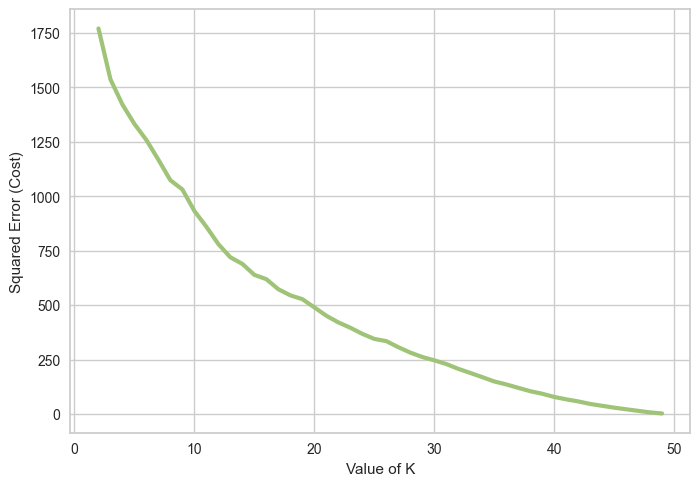

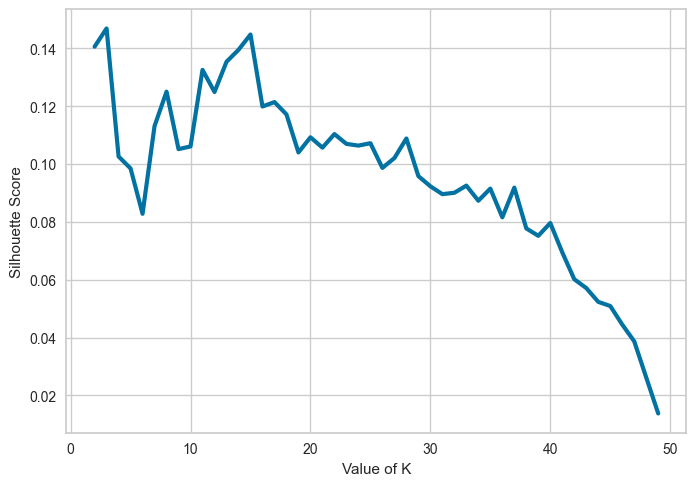

In [24]:
clustering(lifesnaps_all_grouped_pca, 50)

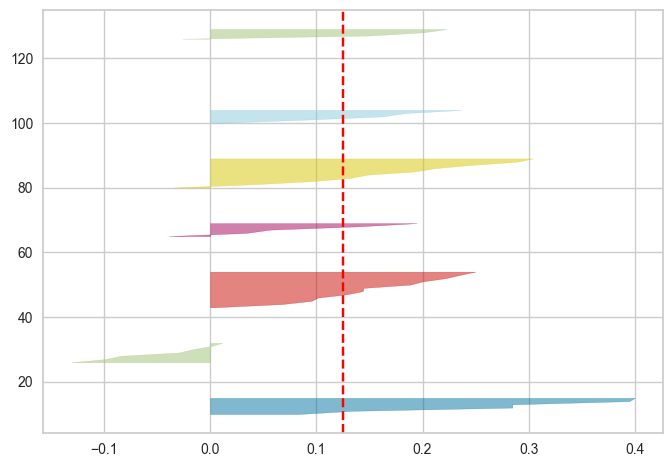

In [25]:
silhouette(lifesnaps_all_grouped_pca, 8)

In [26]:
kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(lifesnaps_all_grouped)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
5          12
2           9
6           8
1           7
3           6
0           5
7           2
4           1
dtype: int64

In [28]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,0.137667,0.550383,1.185662,0.130018,0.132717,0.237689,0.442019,1.130410,0.477346,-0.170125,0.066683,-0.107376,0.0,0.687777,0.469691,0.0,0.0,0.0,-0.399011,-0.547277,0.066628,0.115748,1.076337,0.0,-0.490072,1.829539,0.973492,0.451844,1.434234,0.426821,0.428736,0.385960,0.738604,-0.333509,-0.314290,1.252565,-0.482196,-0.933817,0.427678,0.473683,0.830391,0.531479,0.279630,-0.012719,0.578325,1.056755,-0.306786,0.816497,0.800000,0.600000,1.200000,0.800000,1.000000
1,-0.141399,-0.265402,0.171501,-0.171290,0.056476,0.356920,-0.051042,0.696095,-0.089688,-0.170125,1.882600,1.988971,0.0,0.875974,0.352373,0.0,0.0,0.0,0.218011,-0.680979,1.882675,1.830475,0.746658,0.0,0.127403,-0.276357,0.738752,-0.064153,0.236187,1.271941,1.266694,0.478071,0.369794,0.137384,0.586038,0.232745,0.177297,-0.400718,1.273364,1.254034,0.710051,0.084696,-0.300134,-0.044517,0.269551,-0.615147,0.432787,-0.349927,1.285714,1.142857,0.857143,1.142857,1.285714
2,0.729268,-0.763622,0.394814,0.465241,1.350526,-1.043366,0.675427,-0.215715,0.958330,-0.170125,-0.526517,-0.660204,0.0,0.510424,-0.357826,0.0,0.0,0.0,-1.334134,-0.501232,-0.526484,-0.433413,-0.222544,0.0,-1.398581,0.506550,-0.231212,0.948042,-0.323190,-0.380954,-0.504273,0.652379,-0.863699,0.441288,-0.136108,0.323102,-1.381621,-0.468772,-0.380595,-0.349778,-0.181501,1.130483,-0.209791,-0.238835,0.260279,0.705600,-0.157654,0.589692,0.666667,1.111111,0.888889,0.888889,0.555556
3,-0.215018,0.108768,-0.378641,0.451444,-0.482256,-0.084416,-0.235959,-0.436745,0.332192,-0.170125,-0.907860,-0.695193,0.0,-0.397867,-0.359792,0.0,0.0,0.0,0.281590,0.116243,-0.907851,-0.943348,-0.445318,0.0,0.100493,-0.119136,-0.291804,0.283661,-0.458499,-1.004433,-0.857977,0.125961,0.113321,-0.660402,-0.260609,-0.462203,0.257841,0.424024,-1.004411,-1.047058,-0.300461,-0.640720,-1.151515,-1.130931,-1.062209,-0.165427,-0.370700,0.136083,1.666667,2.000000,2.000000,1.000000,1.500000
4,-0.626681,0.250456,1.492975,0.108266,0.673616,2.109814,2.779153,4.128356,0.444591,-0.170125,1.337825,1.719055,0.0,1.237353,5.244827,0.0,0.0,0.0,1.179572,-0.603152,1.337846,1.527876,4.113281,0.0,1.466930,2.280024,1.712249,0.339671,1.804765,0.705951,0.979918,-0.491994,4.112211,-0.096809,-0.502668,2.564876,1.150266,-1.287578,0.706988,0.910745,1.678622,2.443579,-0.141052,1.386371,0.811991,0.143205,0.651920,0.816497,0.000000,1.000000,1.000000,0.000000,0.000000
5,-0.598680,0.229014,-0.482429,-0.043395,-0.493826,0.209991,0.249567,-0.109645,-0.529715,-0.170125,-0.039246,-0.170357,0.0,0.053433,-0.206403,0.0,0.0,0.0,0.161188,0.432870,-0.039299,-0.001929,-0.096860,0.0,0.005944,-0.461180,-0.315122,-0.553684,0.175824,0.349118,0.357128,0.303746,-0.329584,-0.251297,-0.326167,-0.445904,0.255708,-0.106372,0.349914,0.401546,-0.232649,-0.513477,0.642572,0.366201,-0.551064,-0.350606,-0.051131,-0.714435,0.750000,0.583333,0.916667,0.916667,0.916667
6,-0.076418,-0.450485,-0.664613,-0.746205,-0.681638,0.728428,-0.278591,-0.001432,-0.558818,-0.170125,-0.854895,-0.721435,0.0,-0.603661,0.545796,0.0,0.0,0.0,1.127097,1.041097,-0.854870,-0.855090,-0.028006,0.0,0.965797,-0.563677,-0.549746,-0.621283,-0.827011,-1.109536,-1.086231,-1.270576,0.036386,0.214996,0.109951,-0.665603,0.875813,1.067094,-1.109605,-1.171076,-0.556842,-0.763592,0.369335,0.412573,0.373866,-0.057405,0.148599,-0.204124,0.750000,0.500000,0.750000,0.750000,0.500000
7,-0.092540,-1.065650,1.345661,-1.472999,0.366713,0.293936,1.564185,-0.067610,0.661563,5.869317,0.066683,-0.170357,0.0,1.513477,-0.144457,0.0,0.0,0.0,0.522682,-0.144509,0.066577,0.115748,-0.062463,0.0,0.228204,0.723210,-0.562235,0.618088,0.393546,-0.249975,-0.378746,0.465718,0.863818,-0.473999,-0.502668,0.715282,0.614697,-0.973413,-0.249589,-0.203557,-0.594566,0.389231,-0.512243,0.114471,1.031054,-0.906142,0.460179,0.816497,1.500000,0.500000,0.500000,2.000000,0.500000


####  Visualization with t-SNE

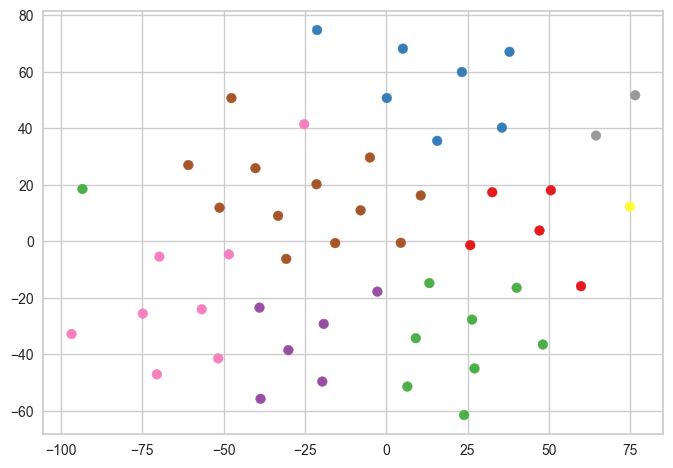

In [41]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
model = kmeans.fit(lifesnaps_all_grouped)
tsne = TSNE().fit_transform(lifesnaps_all_grouped)
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set1')

<AxesSubplot:xlabel='x', ylabel='y'>

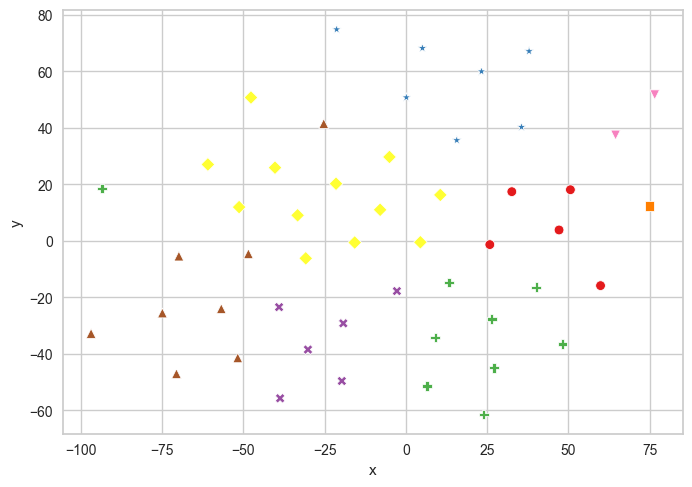

In [42]:
test = pd.concat([pd.DataFrame(tsne, columns=['x','y']),pd.DataFrame(model.labels_, columns=['c'])], axis=1)
mark = ["o", "*", "P", "X", "s", "D", "^", "v"]
sns.scatterplot(data=test, x="x", y="y",palette='Set1', hue="c", style='c', legend=False, markers = mark)

In [108]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,621e2e8e67b776a24055b564,2
1,621e2eaf67b776a2406b14ac,1
2,621e2ed667b776a24085d8d1,5
3,621e2f3967b776a240c654db,2
4,621e2f6167b776a240e082a9,5
5,621e2f7a67b776a240f14425,2
6,621e2f9167b776a240011ccb,5
7,621e2fb367b776a24015accd,5
8,621e2fce67b776a240279baa,7
9,621e2ff067b776a2403eb737,5


In [109]:
lifesnaps_grouped_all = pd.merge(lifesnaps, clusters, on = "id")
lifesnaps_grouped_all

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,dataset,stress,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,22,-0.988831,-0.149042,4,-0.900969,-0.433884,2021,Train,1,4
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,...,29,-0.365341,-0.930874,1,0.623490,0.781831,2021,Train,0,4
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,23.0,...,24,-0.900969,-0.433884,1,0.623490,0.781831,2021,Train,0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,27,-0.623490,-0.781831,0,1.000000,0.000000,2021,Train,0,4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,...,25,-0.826239,-0.563320,4,-0.900969,-0.433884,2021,Train,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,27,-0.623490,-0.781831,6,0.623490,-0.781831,2021,Test,0,6
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,25,-0.826239,-0.563320,1,0.623490,0.781831,2021,Test,0,6
5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,28,-0.500000,-0.866025,4,-0.900969,-0.433884,2021,Test,0,6
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,28,-0.500000,-0.866025,3,-0.900969,0.433884,2021,Test,0,6


In [110]:
lifesnaps_grouped_all.to_csv("Final_CSVs/lifesnaps_clusters_all8_new.csv", index = False)

In [111]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

lifesnaps_grouped_all = lifesnaps_grouped_all.drop('dataset', axis = 1)
lifesnaps_grouped_all

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,stress,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,20.0,22,-0.988831,-0.149042,4,-0.900969,-0.433884,2021,1,4
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,...,64.0,29,-0.365341,-0.930874,1,0.623490,0.781831,2021,0,4
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,23.0,...,76.0,24,-0.900969,-0.433884,1,0.623490,0.781831,2021,0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,90.0,27,-0.623490,-0.781831,0,1.000000,0.000000,2021,0,4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,...,29.0,25,-0.826239,-0.563320,4,-0.900969,-0.433884,2021,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,35.0,27,-0.623490,-0.781831,6,0.623490,-0.781831,2021,0,6
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,0.0,25,-0.826239,-0.563320,1,0.623490,0.781831,2021,0,6
5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,42.0,28,-0.500000,-0.866025,4,-0.900969,-0.433884,2021,0,6
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,58.0,28,-0.500000,-0.866025,3,-0.900969,0.433884,2021,0,6


In [112]:
unique_participants = lifesnaps_grouped_all["Cluster"].unique()
lifesnaps_group = lifesnaps_grouped_all.groupby('Cluster')

In [117]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = lifesnaps_group.get_group(participant)
    grid = setup(data=part_df, target='stress', fix_imbalance = True, html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models(sort="F1")
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

Participant:  4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.46,0.45,0.5,0.1933,0.25,-0.0006,-0.019,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.775,0.825,0.8,0.5583,0.6233,0.5131,0.5475,0.255
lr,Logistic Regression,0.460,0.450,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.775,0.825,0.8,0.5583,0.6233,0.5131,0.5475,0.255
nb,Naive Bayes,0.700,0.800,0.7,0.4083,0.4900,0.3123,0.3579,0.005
lr,Logistic Regression,0.460,0.450,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559
qda,Quadratic Discriminant Analysis,0.790,0.5000,0.0,0.0000,0.0000,0.0000,0.0000,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
ada,Ada Boost Classifier,0.850,0.8167,0.7,0.6000,0.6333,0.5545,0.5690,0.015
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559
qda,Quadratic Discriminant Analysis,0.790,0.5000,0.0,0.0000,0.0000,0.0000,0.0000,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
ada,Ada Boost Classifier,0.850,0.8167,0.7,0.6000,0.6333,0.5545,0.5690,0.015
gbc,Gradient Boosting Classifier,0.875,0.8375,0.7,0.6000,0.6333,0.5841,0.5975,0.014
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559
qda,Quadratic Discriminant Analysis,0.790,0.5000,0.0,0.0000,0.0000,0.0000,0.0000,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
ada,Ada Boost Classifier,0.850,0.8167,0.7,0.6000,0.6333,0.5545,0.5690,0.015
gbc,Gradient Boosting Classifier,0.875,0.8375,0.7,0.6000,0.6333,0.5841,0.5975,0.014
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
lda,Linear Discriminant Analysis,0.665,0.8417,0.6,0.3167,0.4000,0.2099,0.2477,0.006
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006
lr,Logistic Regression,0.460,0.4500,0.5,0.1933,0.2500,-0.0006,-0.0190,0.559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
ada,Ada Boost Classifier,0.850,0.8167,0.7,0.6000,0.6333,0.5545,0.5690,0.015
gbc,Gradient Boosting Classifier,0.875,0.8375,0.7,0.6000,0.6333,0.5841,0.5975,0.014
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
et,Extra Trees Classifier,0.895,0.9125,0.6,0.6000,0.6000,0.5750,0.5750,0.030
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
lda,Linear Discriminant Analysis,0.665,0.8417,0.6,0.3167,0.4000,0.2099,0.2477,0.006
svm,SVM - Linear Kernel,0.330,0.0000,0.8,0.1700,0.2800,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
ada,Ada Boost Classifier,0.850,0.8167,0.7,0.6000,0.6333,0.5545,0.5690,0.015
gbc,Gradient Boosting Classifier,0.875,0.8375,0.7,0.6000,0.6333,0.5841,0.5975,0.014
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
et,Extra Trees Classifier,0.895,0.9125,0.6,0.6000,0.6000,0.5750,0.5750,0.030
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
lightgbm,Light Gradient Boosting Machine,0.830,0.8333,0.6,0.5000,0.5333,0.4545,0.4690,0.062
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
lda,Linear Discriminant Analysis,0.665,0.8417,0.6,0.3167,0.4000,0.2099,0.2477,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
ada,Ada Boost Classifier,0.850,0.8167,0.7,0.6000,0.6333,0.5545,0.5690,0.015
gbc,Gradient Boosting Classifier,0.875,0.8375,0.7,0.6000,0.6333,0.5841,0.5975,0.014
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
et,Extra Trees Classifier,0.895,0.9125,0.6,0.6000,0.6000,0.5750,0.5750,0.030
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
lightgbm,Light Gradient Boosting Machine,0.830,0.8333,0.6,0.5000,0.5333,0.4545,0.4690,0.062
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
lda,Linear Discriminant Analysis,0.665,0.8417,0.6,0.3167,0.4000,0.2099,0.2477,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.835,0.0000,0.8,0.6000,0.6667,0.5818,0.6041,0.005
dt,Decision Tree Classifier,0.875,0.8125,0.7,0.6000,0.6333,0.5841,0.5975,0.005
ada,Ada Boost Classifier,0.850,0.8167,0.7,0.6000,0.6333,0.5545,0.5690,0.015
gbc,Gradient Boosting Classifier,0.875,0.8375,0.7,0.6000,0.6333,0.5841,0.5975,0.014
knn,K Neighbors Classifier,0.775,0.8250,0.8,0.5583,0.6233,0.5131,0.5475,0.255
et,Extra Trees Classifier,0.895,0.9125,0.6,0.6000,0.6000,0.5750,0.5750,0.030
rf,Random Forest Classifier,0.875,0.9000,0.6,0.5500,0.5667,0.5295,0.5362,0.035
lightgbm,Light Gradient Boosting Machine,0.830,0.8333,0.6,0.5000,0.5333,0.4545,0.4690,0.062
nb,Naive Bayes,0.700,0.8000,0.7,0.4083,0.4900,0.3123,0.3579,0.005
lda,Linear Discriminant Analysis,0.665,0.8417,0.6,0.3167,0.4000,0.2099,0.2477,0.006


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=7413,
                solver='auto', tol=0.001)
Participant:  2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.617,0.58,0.3738,0.1267,0.1839,0.0199,0.0225,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011
svm,SVM - Linear Kernel,0.3529,0.0000,0.7000,0.0899,0.1593,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011
svm,SVM - Linear Kernel,0.3529,0.0000,0.7000,0.0899,0.1593,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011
svm,SVM - Linear Kernel,0.3529,0.0000,0.7000,0.0899,0.1593,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011
svm,SVM - Linear Kernel,0.3529,0.0000,0.7000,0.0899,0.1593,0.0000,0.0000,0.008
qda,Quadratic Discriminant Analysis,0.8575,0.4910,0.0000,0.0000,0.0000,-0.0274,-0.0402,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
ada,Ada Boost Classifier,0.8652,0.8590,0.4500,0.4820,0.4442,0.3704,0.3825,0.034
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011
svm,SVM - Linear Kernel,0.3529,0.0000,0.7000,0.0899,0.1593,0.0000,0.0000,0.008
qda,Quadratic Discriminant Analysis,0.8575,0.4910,0.0000,0.0000,0.0000,-0.0274,-0.0402,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
ada,Ada Boost Classifier,0.8652,0.8590,0.4500,0.4820,0.4442,0.3704,0.3825,0.034
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
gbc,Gradient Boosting Classifier,0.8652,0.8685,0.3833,0.5536,0.4255,0.3534,0.3752,0.082
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011
svm,SVM - Linear Kernel,0.3529,0.0000,0.7000,0.0899,0.1593,0.0000,0.0000,0.008
qda,Quadratic Discriminant Analysis,0.8575,0.4910,0.0000,0.0000,0.0000,-0.0274,-0.0402,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8204,0.8417,0.7119,0.3903,0.4993,0.4019,0.4325,0.012
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
ada,Ada Boost Classifier,0.8652,0.8590,0.4500,0.4820,0.4442,0.3704,0.3825,0.034
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
gbc,Gradient Boosting Classifier,0.8652,0.8685,0.3833,0.5536,0.4255,0.3534,0.3752,0.082
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011
svm,SVM - Linear Kernel,0.3529,0.0000,0.7000,0.0899,0.1593,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8204,0.8417,0.7119,0.3903,0.4993,0.4019,0.4325,0.012
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
et,Extra Trees Classifier,0.8847,0.8846,0.4024,0.5717,0.4590,0.3999,0.4134,0.036
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
ada,Ada Boost Classifier,0.8652,0.8590,0.4500,0.4820,0.4442,0.3704,0.3825,0.034
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
gbc,Gradient Boosting Classifier,0.8652,0.8685,0.3833,0.5536,0.4255,0.3534,0.3752,0.082
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007
lr,Logistic Regression,0.6170,0.5800,0.3738,0.1267,0.1839,0.0199,0.0225,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8204,0.8417,0.7119,0.3903,0.4993,0.4019,0.4325,0.012
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
et,Extra Trees Classifier,0.8847,0.8846,0.4024,0.5717,0.4590,0.3999,0.4134,0.036
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
ada,Ada Boost Classifier,0.8652,0.8590,0.4500,0.4820,0.4442,0.3704,0.3825,0.034
lightgbm,Light Gradient Boosting Machine,0.8808,0.8694,0.3667,0.5997,0.4342,0.3738,0.3984,0.079
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
gbc,Gradient Boosting Classifier,0.8652,0.8685,0.3833,0.5536,0.4255,0.3534,0.3752,0.082
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8204,0.8417,0.7119,0.3903,0.4993,0.4019,0.4325,0.012
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
et,Extra Trees Classifier,0.8847,0.8846,0.4024,0.5717,0.4590,0.3999,0.4134,0.036
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
ada,Ada Boost Classifier,0.8652,0.8590,0.4500,0.4820,0.4442,0.3704,0.3825,0.034
lightgbm,Light Gradient Boosting Machine,0.8808,0.8694,0.3667,0.5997,0.4342,0.3738,0.3984,0.079
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
gbc,Gradient Boosting Classifier,0.8652,0.8685,0.3833,0.5536,0.4255,0.3534,0.3752,0.082
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8204,0.8417,0.7119,0.3903,0.4993,0.4019,0.4325,0.012
ridge,Ridge Classifier,0.8165,0.0000,0.7119,0.3827,0.4947,0.3951,0.4260,0.006
et,Extra Trees Classifier,0.8847,0.8846,0.4024,0.5717,0.4590,0.3999,0.4134,0.036
dt,Decision Tree Classifier,0.8419,0.7000,0.5095,0.4242,0.4529,0.3636,0.3714,0.008
ada,Ada Boost Classifier,0.8652,0.8590,0.4500,0.4820,0.4442,0.3704,0.3825,0.034
lightgbm,Light Gradient Boosting Machine,0.8808,0.8694,0.3667,0.5997,0.4342,0.3738,0.3984,0.079
rf,Random Forest Classifier,0.8847,0.8810,0.3548,0.6133,0.4283,0.3718,0.3987,0.047
gbc,Gradient Boosting Classifier,0.8652,0.8685,0.3833,0.5536,0.4255,0.3534,0.3752,0.082
knn,K Neighbors Classifier,0.6776,0.6529,0.4905,0.1968,0.2790,0.1201,0.1409,0.013
nb,Naive Bayes,0.3671,0.5126,0.7119,0.1315,0.2214,0.0097,0.0217,0.007


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Participant:  1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.01


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0518,0.0979,0.0000,0.0000,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0518,0.0979,0.0000,0.0000,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0518,0.0979,0.0000,0.0000,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0518,0.0979,0.0000,0.0000,0.011
qda,Quadratic Discriminant Analysis,0.9253,0.5141,0.0500,0.0333,0.0400,0.0179,0.0179,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
ada,Ada Boost Classifier,0.9420,0.9573,0.4500,0.5000,0.4538,0.4269,0.4369,0.034
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0518,0.0979,0.0000,0.0000,0.011
qda,Quadratic Discriminant Analysis,0.9253,0.5141,0.0500,0.0333,0.0400,0.0179,0.0179,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9523,0.9718,0.6833,0.6567,0.6324,0.6087,0.6278,0.087
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
ada,Ada Boost Classifier,0.9420,0.9573,0.4500,0.5000,0.4538,0.4269,0.4369,0.034
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0518,0.0979,0.0000,0.0000,0.011
qda,Quadratic Discriminant Analysis,0.9253,0.5141,0.0500,0.0333,0.0400,0.0179,0.0179,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9523,0.9718,0.6833,0.6567,0.6324,0.6087,0.6278,0.087
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
lda,Linear Discriminant Analysis,0.9232,0.9383,0.8500,0.4262,0.5575,0.5226,0.5645,0.010
ada,Ada Boost Classifier,0.9420,0.9573,0.4500,0.5000,0.4538,0.4269,0.4369,0.034
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0518,0.0979,0.0000,0.0000,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9523,0.9718,0.6833,0.6567,0.6324,0.6087,0.6278,0.087
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
et,Extra Trees Classifier,0.9524,0.9747,0.5667,0.7150,0.5790,0.5558,0.5870,0.050
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
lda,Linear Discriminant Analysis,0.9232,0.9383,0.8500,0.4262,0.5575,0.5226,0.5645,0.010
ada,Ada Boost Classifier,0.9420,0.9573,0.4500,0.5000,0.4538,0.4269,0.4369,0.034
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010
knn,K Neighbors Classifier,0.6807,0.6788,0.5333,0.0970,0.1614,0.0745,0.1157,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9565,0.9754,0.7167,0.6717,0.6490,0.6274,0.6505,0.101
gbc,Gradient Boosting Classifier,0.9523,0.9718,0.6833,0.6567,0.6324,0.6087,0.6278,0.087
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
et,Extra Trees Classifier,0.9524,0.9747,0.5667,0.7150,0.5790,0.5558,0.5870,0.050
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
lda,Linear Discriminant Analysis,0.9232,0.9383,0.8500,0.4262,0.5575,0.5226,0.5645,0.010
ada,Ada Boost Classifier,0.9420,0.9573,0.4500,0.5000,0.4538,0.4269,0.4369,0.034
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9565,0.9754,0.7167,0.6717,0.6490,0.6274,0.6505,0.101
gbc,Gradient Boosting Classifier,0.9523,0.9718,0.6833,0.6567,0.6324,0.6087,0.6278,0.087
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
et,Extra Trees Classifier,0.9524,0.9747,0.5667,0.7150,0.5790,0.5558,0.5870,0.050
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
lda,Linear Discriminant Analysis,0.9232,0.9383,0.8500,0.4262,0.5575,0.5226,0.5645,0.010
ada,Ada Boost Classifier,0.9420,0.9573,0.4500,0.5000,0.4538,0.4269,0.4369,0.034
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9565,0.9754,0.7167,0.6717,0.6490,0.6274,0.6505,0.101
gbc,Gradient Boosting Classifier,0.9523,0.9718,0.6833,0.6567,0.6324,0.6087,0.6278,0.087
dt,Decision Tree Classifier,0.9502,0.8096,0.6500,0.5900,0.5921,0.5670,0.5818,0.010
ridge,Ridge Classifier,0.9315,0.0000,0.8500,0.4512,0.5814,0.5491,0.5857,0.008
et,Extra Trees Classifier,0.9524,0.9747,0.5667,0.7150,0.5790,0.5558,0.5870,0.050
rf,Random Forest Classifier,0.9482,0.9762,0.5500,0.6967,0.5619,0.5368,0.5673,0.041
lda,Linear Discriminant Analysis,0.9232,0.9383,0.8500,0.4262,0.5575,0.5226,0.5645,0.010
ada,Ada Boost Classifier,0.9420,0.9573,0.4500,0.5000,0.4538,0.4269,0.4369,0.034
nb,Naive Bayes,0.5581,0.7009,0.8167,0.1001,0.1777,0.0873,0.1738,0.007
lr,Logistic Regression,0.5639,0.7078,0.7667,0.1017,0.1774,0.0885,0.1566,0.010


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1350, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Participant:  6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008
svm,SVM - Linear Kernel,0.3438,0.0000,0.7000,0.0751,0.1357,0.0000,0.0000,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008
svm,SVM - Linear Kernel,0.3438,0.0000,0.7000,0.0751,0.1357,0.0000,0.0000,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008
svm,SVM - Linear Kernel,0.3438,0.0000,0.7000,0.0751,0.1357,0.0000,0.0000,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008
svm,SVM - Linear Kernel,0.3438,0.0000,0.7000,0.0751,0.1357,0.0000,0.0000,0.016
qda,Quadratic Discriminant Analysis,0.8699,0.5182,0.0714,0.1667,0.1000,0.0489,0.0508,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
ada,Ada Boost Classifier,0.8901,0.9046,0.4929,0.5053,0.4870,0.4269,0.4334,0.039
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008
svm,SVM - Linear Kernel,0.3438,0.0000,0.7000,0.0751,0.1357,0.0000,0.0000,0.016
qda,Quadratic Discriminant Analysis,0.8699,0.5182,0.0714,0.1667,0.1000,0.0489,0.0508,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
gbc,Gradient Boosting Classifier,0.8855,0.9355,0.5238,0.4681,0.4915,0.4277,0.4301,0.094
ada,Ada Boost Classifier,0.8901,0.9046,0.4929,0.5053,0.4870,0.4269,0.4334,0.039
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008
svm,SVM - Linear Kernel,0.3438,0.0000,0.7000,0.0751,0.1357,0.0000,0.0000,0.016
qda,Quadratic Discriminant Analysis,0.8699,0.5182,0.0714,0.1667,0.1000,0.0489,0.0508,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
lda,Linear Discriminant Analysis,0.8510,0.8515,0.7619,0.4036,0.5230,0.4460,0.4804,0.012
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
gbc,Gradient Boosting Classifier,0.8855,0.9355,0.5238,0.4681,0.4915,0.4277,0.4301,0.094
ada,Ada Boost Classifier,0.8901,0.9046,0.4929,0.5053,0.4870,0.4269,0.4334,0.039
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008
svm,SVM - Linear Kernel,0.3438,0.0000,0.7000,0.0751,0.1357,0.0000,0.0000,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9012,0.9421,0.6286,0.5294,0.5730,0.5177,0.5213,0.057
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
lda,Linear Discriminant Analysis,0.8510,0.8515,0.7619,0.4036,0.5230,0.4460,0.4804,0.012
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
gbc,Gradient Boosting Classifier,0.8855,0.9355,0.5238,0.4681,0.4915,0.4277,0.4301,0.094
ada,Ada Boost Classifier,0.8901,0.9046,0.4929,0.5053,0.4870,0.4269,0.4334,0.039
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017
lr,Logistic Regression,0.8026,0.6865,0.4405,0.1811,0.2556,0.1755,0.2018,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9012,0.9421,0.6286,0.5294,0.5730,0.5177,0.5213,0.057
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
lightgbm,Light Gradient Boosting Machine,0.9012,0.9368,0.5690,0.5423,0.5524,0.4972,0.4990,0.112
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
lda,Linear Discriminant Analysis,0.8510,0.8515,0.7619,0.4036,0.5230,0.4460,0.4804,0.012
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
gbc,Gradient Boosting Classifier,0.8855,0.9355,0.5238,0.4681,0.4915,0.4277,0.4301,0.094
ada,Ada Boost Classifier,0.8901,0.9046,0.4929,0.5053,0.4870,0.4269,0.4334,0.039
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9012,0.9421,0.6286,0.5294,0.5730,0.5177,0.5213,0.057
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
lightgbm,Light Gradient Boosting Machine,0.9012,0.9368,0.5690,0.5423,0.5524,0.4972,0.4990,0.112
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
lda,Linear Discriminant Analysis,0.8510,0.8515,0.7619,0.4036,0.5230,0.4460,0.4804,0.012
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
gbc,Gradient Boosting Classifier,0.8855,0.9355,0.5238,0.4681,0.4915,0.4277,0.4301,0.094
ada,Ada Boost Classifier,0.8901,0.9046,0.4929,0.5053,0.4870,0.4269,0.4334,0.039
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9012,0.9421,0.6286,0.5294,0.5730,0.5177,0.5213,0.057
rf,Random Forest Classifier,0.8981,0.9439,0.6143,0.5181,0.5595,0.5026,0.5065,0.057
lightgbm,Light Gradient Boosting Machine,0.9012,0.9368,0.5690,0.5423,0.5524,0.4972,0.4990,0.112
ridge,Ridge Classifier,0.8495,0.0000,0.7929,0.4032,0.5296,0.4525,0.4924,0.013
lda,Linear Discriminant Analysis,0.8510,0.8515,0.7619,0.4036,0.5230,0.4460,0.4804,0.012
dt,Decision Tree Classifier,0.8917,0.7482,0.5667,0.4913,0.5215,0.4613,0.4656,0.009
gbc,Gradient Boosting Classifier,0.8855,0.9355,0.5238,0.4681,0.4915,0.4277,0.4301,0.094
ada,Ada Boost Classifier,0.8901,0.9046,0.4929,0.5053,0.4870,0.4269,0.4334,0.039
nb,Naive Bayes,0.8040,0.7763,0.6310,0.3036,0.4076,0.3087,0.3391,0.007
knn,K Neighbors Classifier,0.7555,0.7181,0.5381,0.2291,0.3201,0.2013,0.2284,0.017


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7072, verbose=0,
                     warm_start=False)
Participant:  5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8161,0.6261,0.219,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
svm,SVM - Linear Kernel,0.2891,0.0000,0.8000,0.1184,0.2063,0.0000,0.0000,0.014
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
svm,SVM - Linear Kernel,0.2891,0.0000,0.8000,0.1184,0.2063,0.0000,0.0000,0.014
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
svm,SVM - Linear Kernel,0.2891,0.0000,0.8000,0.1184,0.2063,0.0000,0.0000,0.014
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
svm,SVM - Linear Kernel,0.2891,0.0000,0.8000,0.1184,0.2063,0.0000,0.0000,0.014
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
ada,Ada Boost Classifier,0.8542,0.8922,0.5857,0.5241,0.5461,0.4610,0.4662,0.052
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
svm,SVM - Linear Kernel,0.2891,0.0000,0.8000,0.1184,0.2063,0.0000,0.0000,0.014
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
ada,Ada Boost Classifier,0.8542,0.8922,0.5857,0.5241,0.5461,0.4610,0.4662,0.052
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
gbc,Gradient Boosting Classifier,0.8502,0.9048,0.5581,0.4997,0.5246,0.4366,0.4391,0.157
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
svm,SVM - Linear Kernel,0.2891,0.0000,0.8000,0.1184,0.2063,0.0000,0.0000,0.014
lr,Logistic Regression,0.8161,0.6261,0.2190,0.0981,0.1335,0.0915,0.1058,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
ada,Ada Boost Classifier,0.8542,0.8922,0.5857,0.5241,0.5461,0.4610,0.4662,0.052
lda,Linear Discriminant Analysis,0.8019,0.8754,0.7681,0.4203,0.5399,0.4299,0.4627,0.013
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
gbc,Gradient Boosting Classifier,0.8502,0.9048,0.5581,0.4997,0.5246,0.4366,0.4391,0.157
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022
svm,SVM - Linear Kernel,0.2891,0.0000,0.8000,0.1184,0.2063,0.0000,0.0000,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
ada,Ada Boost Classifier,0.8542,0.8922,0.5857,0.5241,0.5461,0.4610,0.4662,0.052
et,Extra Trees Classifier,0.8663,0.9065,0.5443,0.5518,0.5429,0.4652,0.4683,0.046
lda,Linear Discriminant Analysis,0.8019,0.8754,0.7681,0.4203,0.5399,0.4299,0.4627,0.013
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
gbc,Gradient Boosting Classifier,0.8502,0.9048,0.5581,0.4997,0.5246,0.4366,0.4391,0.157
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009
knn,K Neighbors Classifier,0.6754,0.6906,0.5295,0.2310,0.3199,0.1469,0.1717,0.022


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
ada,Ada Boost Classifier,0.8542,0.8922,0.5857,0.5241,0.5461,0.4610,0.4662,0.052
et,Extra Trees Classifier,0.8663,0.9065,0.5443,0.5518,0.5429,0.4652,0.4683,0.046
lda,Linear Discriminant Analysis,0.8019,0.8754,0.7681,0.4203,0.5399,0.4299,0.4627,0.013
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
gbc,Gradient Boosting Classifier,0.8502,0.9048,0.5581,0.4997,0.5246,0.4366,0.4391,0.157
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
lightgbm,Light Gradient Boosting Machine,0.8583,0.9028,0.4962,0.5268,0.5010,0.4200,0.4259,0.094
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
ada,Ada Boost Classifier,0.8542,0.8922,0.5857,0.5241,0.5461,0.4610,0.4662,0.052
et,Extra Trees Classifier,0.8663,0.9065,0.5443,0.5518,0.5429,0.4652,0.4683,0.046
lda,Linear Discriminant Analysis,0.8019,0.8754,0.7681,0.4203,0.5399,0.4299,0.4627,0.013
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
gbc,Gradient Boosting Classifier,0.8502,0.9048,0.5581,0.4997,0.5246,0.4366,0.4391,0.157
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
lightgbm,Light Gradient Boosting Machine,0.8583,0.9028,0.4962,0.5268,0.5010,0.4200,0.4259,0.094
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.8086,0.4269,0.5545,0.4466,0.4861,0.009
ada,Ada Boost Classifier,0.8542,0.8922,0.5857,0.5241,0.5461,0.4610,0.4662,0.052
et,Extra Trees Classifier,0.8663,0.9065,0.5443,0.5518,0.5429,0.4652,0.4683,0.046
lda,Linear Discriminant Analysis,0.8019,0.8754,0.7681,0.4203,0.5399,0.4299,0.4627,0.013
rf,Random Forest Classifier,0.8713,0.9137,0.5243,0.5689,0.5324,0.4603,0.4674,0.060
gbc,Gradient Boosting Classifier,0.8502,0.9048,0.5581,0.4997,0.5246,0.4366,0.4391,0.157
qda,Quadratic Discriminant Analysis,0.7507,0.8283,0.9162,0.3658,0.5219,0.3939,0.4702,0.012
lightgbm,Light Gradient Boosting Machine,0.8583,0.9028,0.4962,0.5268,0.5010,0.4200,0.4259,0.094
dt,Decision Tree Classifier,0.8382,0.7080,0.5233,0.4624,0.4889,0.3937,0.3959,0.014
nb,Naive Bayes,0.5797,0.7356,0.8367,0.2410,0.3730,0.1861,0.2666,0.009


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2417,
                solver='auto', tol=0.001)
Participant:  0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009
svm,SVM - Linear Kernel,0.5272,0.0000,0.4000,0.1272,0.1930,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009
svm,SVM - Linear Kernel,0.5272,0.0000,0.4000,0.1272,0.1930,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009
svm,SVM - Linear Kernel,0.5272,0.0000,0.4000,0.1272,0.1930,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009
qda,Quadratic Discriminant Analysis,0.6837,0.5457,0.1458,0.4517,0.2117,0.1080,0.1278,0.007
svm,SVM - Linear Kernel,0.5272,0.0000,0.4000,0.1272,0.1930,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
ada,Ada Boost Classifier,0.7610,0.8471,0.6597,0.6437,0.6400,0.4631,0.4712,0.024
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009
qda,Quadratic Discriminant Analysis,0.6837,0.5457,0.1458,0.4517,0.2117,0.1080,0.1278,0.007
svm,SVM - Linear Kernel,0.5272,0.0000,0.4000,0.1272,0.1930,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
gbc,Gradient Boosting Classifier,0.7577,0.8572,0.6389,0.6670,0.6436,0.4615,0.4683,0.047
ada,Ada Boost Classifier,0.7610,0.8471,0.6597,0.6437,0.6400,0.4631,0.4712,0.024
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009
qda,Quadratic Discriminant Analysis,0.6837,0.5457,0.1458,0.4517,0.2117,0.1080,0.1278,0.007
svm,SVM - Linear Kernel,0.5272,0.0000,0.4000,0.1272,0.1930,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
gbc,Gradient Boosting Classifier,0.7577,0.8572,0.6389,0.6670,0.6436,0.4615,0.4683,0.047
ada,Ada Boost Classifier,0.7610,0.8471,0.6597,0.6437,0.6400,0.4631,0.4712,0.024
lda,Linear Discriminant Analysis,0.7245,0.7844,0.6972,0.5779,0.6207,0.4111,0.4241,0.007
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009
qda,Quadratic Discriminant Analysis,0.6837,0.5457,0.1458,0.4517,0.2117,0.1080,0.1278,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8130,0.8803,0.7181,0.7268,0.7147,0.5766,0.5845,0.034
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
gbc,Gradient Boosting Classifier,0.7577,0.8572,0.6389,0.6670,0.6436,0.4615,0.4683,0.047
ada,Ada Boost Classifier,0.7610,0.8471,0.6597,0.6437,0.6400,0.4631,0.4712,0.024
lda,Linear Discriminant Analysis,0.7245,0.7844,0.6972,0.5779,0.6207,0.4111,0.4241,0.007
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006
knn,K Neighbors Classifier,0.6065,0.6195,0.5347,0.4108,0.4624,0.1590,0.1632,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8130,0.8803,0.7181,0.7268,0.7147,0.5766,0.5845,0.034
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
lightgbm,Light Gradient Boosting Machine,0.7724,0.8573,0.6500,0.6795,0.6519,0.4840,0.4937,0.013
gbc,Gradient Boosting Classifier,0.7577,0.8572,0.6389,0.6670,0.6436,0.4615,0.4683,0.047
ada,Ada Boost Classifier,0.7610,0.8471,0.6597,0.6437,0.6400,0.4631,0.4712,0.024
lda,Linear Discriminant Analysis,0.7245,0.7844,0.6972,0.5779,0.6207,0.4111,0.4241,0.007
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8130,0.8803,0.7181,0.7268,0.7147,0.5766,0.5845,0.034
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
lightgbm,Light Gradient Boosting Machine,0.7724,0.8573,0.6500,0.6795,0.6519,0.4840,0.4937,0.013
gbc,Gradient Boosting Classifier,0.7577,0.8572,0.6389,0.6670,0.6436,0.4615,0.4683,0.047
ada,Ada Boost Classifier,0.7610,0.8471,0.6597,0.6437,0.6400,0.4631,0.4712,0.024
lda,Linear Discriminant Analysis,0.7245,0.7844,0.6972,0.5779,0.6207,0.4111,0.4241,0.007
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8130,0.8803,0.7181,0.7268,0.7147,0.5766,0.5845,0.034
rf,Random Forest Classifier,0.8090,0.8803,0.6861,0.7426,0.7041,0.5643,0.5736,0.036
dt,Decision Tree Classifier,0.7837,0.7698,0.7306,0.6625,0.6899,0.5255,0.5314,0.006
ridge,Ridge Classifier,0.7612,0.0000,0.7500,0.6225,0.6714,0.4882,0.5021,0.005
lightgbm,Light Gradient Boosting Machine,0.7724,0.8573,0.6500,0.6795,0.6519,0.4840,0.4937,0.013
gbc,Gradient Boosting Classifier,0.7577,0.8572,0.6389,0.6670,0.6436,0.4615,0.4683,0.047
ada,Ada Boost Classifier,0.7610,0.8471,0.6597,0.6437,0.6400,0.4631,0.4712,0.024
lda,Linear Discriminant Analysis,0.7245,0.7844,0.6972,0.5779,0.6207,0.4111,0.4241,0.007
nb,Naive Bayes,0.5669,0.7127,0.8333,0.4208,0.5565,0.2174,0.2713,0.006
lr,Logistic Regression,0.5124,0.5707,0.7069,0.3885,0.4843,0.1131,0.1191,0.006


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6465, verbose=0,
                     warm_start=False)
Participant:  3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.231,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006
svm,SVM - Linear Kernel,0.5765,0.0000,0.4000,0.0533,0.0941,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006
svm,SVM - Linear Kernel,0.5765,0.0000,0.4000,0.0533,0.0941,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006
svm,SVM - Linear Kernel,0.5765,0.0000,0.4000,0.0533,0.0941,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006
qda,Quadratic Discriminant Analysis,0.8752,0.5493,0.1089,0.6000,0.1811,0.1488,0.2145,0.009
svm,SVM - Linear Kernel,0.5765,0.0000,0.4000,0.0533,0.0941,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
ada,Ada Boost Classifier,0.9108,0.9355,0.6839,0.6656,0.6647,0.6143,0.6205,0.032
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006
qda,Quadratic Discriminant Analysis,0.8752,0.5493,0.1089,0.6000,0.1811,0.1488,0.2145,0.009
svm,SVM - Linear Kernel,0.5765,0.0000,0.4000,0.0533,0.0941,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
gbc,Gradient Boosting Classifier,0.9268,0.9631,0.8232,0.6982,0.7499,0.7081,0.7149,0.080
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
ada,Ada Boost Classifier,0.9108,0.9355,0.6839,0.6656,0.6647,0.6143,0.6205,0.032
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006
qda,Quadratic Discriminant Analysis,0.8752,0.5493,0.1089,0.6000,0.1811,0.1488,0.2145,0.009
svm,SVM - Linear Kernel,0.5765,0.0000,0.4000,0.0533,0.0941,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
gbc,Gradient Boosting Classifier,0.9268,0.9631,0.8232,0.6982,0.7499,0.7081,0.7149,0.080
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
lda,Linear Discriminant Analysis,0.9037,0.9547,0.8911,0.5994,0.7125,0.6584,0.6795,0.011
ada,Ada Boost Classifier,0.9108,0.9355,0.6839,0.6656,0.6647,0.6143,0.6205,0.032
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006
qda,Quadratic Discriminant Analysis,0.8752,0.5493,0.1089,0.6000,0.1811,0.1488,0.2145,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
gbc,Gradient Boosting Classifier,0.9268,0.9631,0.8232,0.6982,0.7499,0.7081,0.7149,0.080
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
et,Extra Trees Classifier,0.9234,0.9587,0.7964,0.6792,0.7323,0.6880,0.6915,0.040
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
lda,Linear Discriminant Analysis,0.9037,0.9547,0.8911,0.5994,0.7125,0.6584,0.6795,0.011
ada,Ada Boost Classifier,0.9108,0.9355,0.6839,0.6656,0.6647,0.6143,0.6205,0.032
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012
lr,Logistic Regression,0.2310,0.5964,0.9375,0.1487,0.2503,0.0354,0.0462,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
gbc,Gradient Boosting Classifier,0.9268,0.9631,0.8232,0.6982,0.7499,0.7081,0.7149,0.080
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
et,Extra Trees Classifier,0.9234,0.9587,0.7964,0.6792,0.7323,0.6880,0.6915,0.040
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
lda,Linear Discriminant Analysis,0.9037,0.9547,0.8911,0.5994,0.7125,0.6584,0.6795,0.011
lightgbm,Light Gradient Boosting Machine,0.9179,0.9544,0.7536,0.6899,0.7124,0.6657,0.6714,0.070
ada,Ada Boost Classifier,0.9108,0.9355,0.6839,0.6656,0.6647,0.6143,0.6205,0.032
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
gbc,Gradient Boosting Classifier,0.9268,0.9631,0.8232,0.6982,0.7499,0.7081,0.7149,0.080
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
et,Extra Trees Classifier,0.9234,0.9587,0.7964,0.6792,0.7323,0.6880,0.6915,0.040
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
lda,Linear Discriminant Analysis,0.9037,0.9547,0.8911,0.5994,0.7125,0.6584,0.6795,0.011
lightgbm,Light Gradient Boosting Machine,0.9179,0.9544,0.7536,0.6899,0.7124,0.6657,0.6714,0.070
ada,Ada Boost Classifier,0.9108,0.9355,0.6839,0.6656,0.6647,0.6143,0.6205,0.032
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9394,0.8482,0.7250,0.7990,0.7551,0.7208,0.7250,0.009
gbc,Gradient Boosting Classifier,0.9268,0.9631,0.8232,0.6982,0.7499,0.7081,0.7149,0.080
rf,Random Forest Classifier,0.9251,0.9596,0.7964,0.6894,0.7362,0.6931,0.6974,0.041
et,Extra Trees Classifier,0.9234,0.9587,0.7964,0.6792,0.7323,0.6880,0.6915,0.040
ridge,Ridge Classifier,0.9019,0.0000,0.9054,0.5955,0.7130,0.6582,0.6825,0.006
lda,Linear Discriminant Analysis,0.9037,0.9547,0.8911,0.5994,0.7125,0.6584,0.6795,0.011
lightgbm,Light Gradient Boosting Machine,0.9179,0.9544,0.7536,0.6899,0.7124,0.6657,0.6714,0.070
ada,Ada Boost Classifier,0.9108,0.9355,0.6839,0.6656,0.6647,0.6143,0.6205,0.032
nb,Naive Bayes,0.6561,0.7189,0.7804,0.2428,0.3685,0.2137,0.2857,0.006
knn,K Neighbors Classifier,0.6899,0.6953,0.4804,0.2103,0.2910,0.1336,0.1505,0.012


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3741, splitter='best')
Participant:  7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5792,0.4877,0.65,0.6237,0.617,0.0477,0.0418,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.617,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.591,0.0235,0.0391,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007
svm,SVM - Linear Kernel,0.3917,0.0000,0.2000,0.1444,0.1675,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007
svm,SVM - Linear Kernel,0.3917,0.0000,0.2000,0.1444,0.1675,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007
svm,SVM - Linear Kernel,0.3917,0.0000,0.2000,0.1444,0.1675,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007
svm,SVM - Linear Kernel,0.3917,0.0000,0.2000,0.1444,0.1675,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
ada,Ada Boost Classifier,0.7097,0.8020,0.8524,0.7518,0.7975,0.2526,0.2761,0.016
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007
svm,SVM - Linear Kernel,0.3917,0.0000,0.2000,0.1444,0.1675,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
gbc,Gradient Boosting Classifier,0.7194,0.7837,0.8214,0.7850,0.7988,0.3154,0.3314,0.019
ada,Ada Boost Classifier,0.7097,0.8020,0.8524,0.7518,0.7975,0.2526,0.2761,0.016
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007
svm,SVM - Linear Kernel,0.3917,0.0000,0.2000,0.1444,0.1675,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
gbc,Gradient Boosting Classifier,0.7194,0.7837,0.8214,0.7850,0.7988,0.3154,0.3314,0.019
ada,Ada Boost Classifier,0.7097,0.8020,0.8524,0.7518,0.7975,0.2526,0.2761,0.016
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lda,Linear Discriminant Analysis,0.5722,0.5901,0.5810,0.7598,0.6456,0.0977,0.1117,0.012
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005
knn,K Neighbors Classifier,0.5125,0.5415,0.5167,0.7338,0.5910,0.0235,0.0391,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7736,0.8321,0.8714,0.8193,0.8414,0.4394,0.4564,0.035
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
gbc,Gradient Boosting Classifier,0.7194,0.7837,0.8214,0.7850,0.7988,0.3154,0.3314,0.019
ada,Ada Boost Classifier,0.7097,0.8020,0.8524,0.7518,0.7975,0.2526,0.2761,0.016
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lda,Linear Discriminant Analysis,0.5722,0.5901,0.5810,0.7598,0.6456,0.0977,0.1117,0.012
lr,Logistic Regression,0.5792,0.4877,0.6500,0.6237,0.6170,0.0477,0.0418,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7736,0.8321,0.8714,0.8193,0.8414,0.4394,0.4564,0.035
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
lightgbm,Light Gradient Boosting Machine,0.7292,0.7595,0.8048,0.8110,0.8013,0.3533,0.3690,0.007
gbc,Gradient Boosting Classifier,0.7194,0.7837,0.8214,0.7850,0.7988,0.3154,0.3314,0.019
ada,Ada Boost Classifier,0.7097,0.8020,0.8524,0.7518,0.7975,0.2526,0.2761,0.016
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lda,Linear Discriminant Analysis,0.5722,0.5901,0.5810,0.7598,0.6456,0.0977,0.1117,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7736,0.8321,0.8714,0.8193,0.8414,0.4394,0.4564,0.035
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
lightgbm,Light Gradient Boosting Machine,0.7292,0.7595,0.8048,0.8110,0.8013,0.3533,0.3690,0.007
gbc,Gradient Boosting Classifier,0.7194,0.7837,0.8214,0.7850,0.7988,0.3154,0.3314,0.019
ada,Ada Boost Classifier,0.7097,0.8020,0.8524,0.7518,0.7975,0.2526,0.2761,0.016
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lda,Linear Discriminant Analysis,0.5722,0.5901,0.5810,0.7598,0.6456,0.0977,0.1117,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7736,0.8321,0.8714,0.8193,0.8414,0.4394,0.4564,0.035
qda,Quadratic Discriminant Analysis,0.6972,0.5000,1.0000,0.6972,0.8207,0.0000,0.0000,0.005
rf,Random Forest Classifier,0.7417,0.7889,0.8238,0.8240,0.8143,0.3949,0.4184,0.035
nb,Naive Bayes,0.7181,0.7210,0.8381,0.7802,0.8018,0.2974,0.3124,0.006
lightgbm,Light Gradient Boosting Machine,0.7292,0.7595,0.8048,0.8110,0.8013,0.3533,0.3690,0.007
gbc,Gradient Boosting Classifier,0.7194,0.7837,0.8214,0.7850,0.7988,0.3154,0.3314,0.019
ada,Ada Boost Classifier,0.7097,0.8020,0.8524,0.7518,0.7975,0.2526,0.2761,0.016
ridge,Ridge Classifier,0.7083,0.0000,0.7738,0.8052,0.7844,0.3154,0.3232,0.005
dt,Decision Tree Classifier,0.6611,0.6476,0.6786,0.8015,0.7214,0.3046,0.3177,0.005
lda,Linear Discriminant Analysis,0.5722,0.5901,0.5810,0.7598,0.6456,0.0977,0.1117,0.012


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1437, verbose=0,
                     warm_start=False)


In [118]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [119]:
print("Mean Accuracy Lifesnaps - Cluster All Features: ", mean_acc)
print("Mean Precision Lifesnaps- Cluster All Features: ", mean_prec)
print("Mean Recall Lifesnaps- Cluster All Features: ", mean_rec)
print("Mean F1-score Lifesnaps- Cluster All Features: ", mean_f1)

Mean Accuracy Lifesnaps - Cluster All Features:  0.855375
Mean Precision Lifesnaps- Cluster All Features:  0.620425
Mean Recall Lifesnaps- Cluster All Features:  0.7475375
Mean F1-score Lifesnaps- Cluster All Features:  0.6567125
